Aleksandra Bednarczuk

# Survey on Municipal Services of Barcelona's City

Source of the data: 

https://opendata-ajuntament.barcelona.cat/data/en/dataset/esm-bcn-evo

https://opendata-ajuntament.barcelona.cat/doc/BackOff_DescCompDefCamps/EnquestaServeisMunicipals_BCN/2019_Any/2019_r19006_ESM_Questionari_v1_0.pdf

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 1.1. Reading the data

In [2]:
survey = pd.read_csv('../../data/survey/2019_r19006_esm_evolucio_bdd_v1_0/2019_r19006_esm_evolucio_bdd_v1_0.csv', low_memory=False)

In [3]:
survey.head()

,Unnamed: 0,ID,ANY,NOM_DISTRICTE,NOM_BARRI,DATA_ENQ,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,RES_HAB,PADRO,...,DEM_BARRI_N1,CONSULTA_DIARI_Q01_N1,CONSULTA_DIARI_Q02_N1,VEURE_TELE_Q01_N1,VEURE_TELE_Q02_N1,VEURE_TELE_Q03_N1,HAB_COTXE_PART_1A4,US30D_XARXES_Q06,US30D_XARXES_Q07,PMI_1A3_2017
0,1,198900001,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN
1,2,198900002,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ALTRES,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
2,3,198900003,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
3,4,198900004,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,EL PERIÓDICO,NaN,LA 1,NaN,NaN,CAP,NaN,NaN,NaN
4,5,198900005,1989,CIUTAT VELLA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TV3,NaN,NaN,CAP,NaN,NaN,NaN


In [4]:
del survey['Unnamed: 0']

In [5]:
survey.shape

(135813, 285)

In [6]:
for i in survey.columns.tolist():
    print(i, survey[i].unique(), "\n")

ID [198900001 198900002 198900003 ... 201907061 201907062 201907063] 

ANY [1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019] 

NOM_DISTRICTE ['CIUTAT VELLA' 'SANT MARTÍ' 'EIXAMPLE' 'SANTS - MONTJUÏC' 'LES CORTS'
 'SARRIÀ - SANT GERVASI' 'GRÀCIA' 'HORTA - GUINARDÓ' 'NOU BARRIS'
 'SANT ANDREU'] 

NOM_BARRI [nan 'EL RAVAL' 'EL BARRI GÒTIC' 'LA BARCELONETA'
 'SANT PERE, SANTA CATERINA I LA RIBERA' 'EL FORT PIENC'
 'LA SAGRADA FAMÍLIA' "LA DRETA DE L'EIXAMPLE"
 "L'ANTIGA ESQUERRA DE L'EIXAMPLE" "LA NOVA ESQUERRA DE L'EIXAMPLE"
 'SANT ANTONI' 'EL POBLE SEC' 'LA MARINA DEL PRAT VERMELL'
 'LA MARINA DE PORT' 'LA FONT DE LA GUATLLA' 'HOSTAFRANCS' 'LA BORDETA'
 'SANTS-BADAL' 'SANTS' 'LES CORTS' 'LA MATERNITAT I SANT RAMON'
 'PEDRALBES' 'VALLVIDRERA, EL TIBIDABO I LES PLANES' 'SARRIÀ'
 'LES TRES TORRES' 'SANT GERVASI-LA BONANOVA' 'EL PUTXET I EL FARRÓ'
 'SANT GERVASI-GALVANY' 'VALLCARCA I 

VAL_GESTMUNI [nan '8' 'NO CONTESTA' '7' '4' '3' '5' '6' '9' '0 = MOLT DOLENTA'
 '10 = MOLT BONA' '2' '1' 'NO HO SAP'] 

VAL_GESTGENE [nan '7' '8' '10 = MOLT BONA' '5' '6' 'NO HO SAP' '9' '3' '4'
 '0 = MOLT DOLENTA' '1' '2' 'NO CONTESTA' 'PORTA POC TEMPS'
 'NO HO SAP (NO HI HA GOVERN)'] 

VAL_GESTGOESP [nan '5' '6' '10 = MOLT BONA' 'NO HO SAP' '4' '7' '0 = MOLT DOLENTA' '2'
 '3' '8' '1' '9' 'NO CONTESTA' 'PORTA POC TEMPS'] 

DEM_BCN_MUNI [nan 'MILLORAR LA NETEJA (NO CONCRETEN)' 'REDUIR IMPOSTOS I MULTES'
 'AUGMENTAR / MILLORAR LES ZONES VERDES' 'CREAR LLOCS DE TREBALL'
 'NO CONTESTA'
 "PROMOURE LA REHABILITACIÓ D'HABITATGES / FAÇANES / ASCENSORS"
 'AUGMENTAR/MILLORAR SERVEIS (NO CONCRETEN)'
 "MILLORAR L'ACCÉS A L'HABITATGE" 'MILLORAR LA SEGURETAT (NO CONCRETEN)'
 'MILLORAR LA CIRCULACIÓ / EL TRÀNSIT'
 'AUGMENTAR/MILLORAR LA INFORMACIÓ AL CIUTADÀ' 'ERADICAR LA DROGA'
 'AUGMENTAR/MILLORAR ELS EQUIPAMENTS ESPORTIUS' "AUGMENTAR L'APARCAMENT"
 'ALTRES' 'QUE ES MANTINGUI LA MATEIXA POLÍTICA M

VAL_MERCAT ['8' '7' '9' '5' '6' '4' '0 = PÈSSIMA GESTIÓ' '10 = EXCEL·LENT GESTIÓ'
 'NO HO SAP' '3' '2' '1' 'NO CONTESTA' nan] 

VAL_BIBLIO [nan '5' '6' '8' '10 = EXCEL·LENT GESTIÓ' '9' '7' 'NO HO SAP' '1'
 'NO CONTESTA' '2' '4' '0 = PÈSSIMA GESTIÓ' '3'] 

VAL_CC [nan 'NO HO SAP' '10 = EXCEL·LENT GESTIÓ' '8' '7' '9' '6' '5'
 '0 = PÈSSIMA GESTIÓ' '4' '3' '2' '1' 'NO CONTESTA'] 

EVO1A_ESCOMBRARIES [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_NETEJA [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_SOROLL [nan 'HA EMPITJORAT' 'ESTÀ IGUAL' 'HA MILLORAT' 'NO CONTESTA' 'NO HO SAP'] 

EVO1A_VERD [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_ENLLUM [nan 'HA EMPITJORAT' 'HA MILLORAT' 'ESTÀ IGUAL' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_URBA [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO CONTESTA'] 

EVO1A_ASFALT [nan 'HA MILLORAT' 'ESTÀ IGUAL' 'HA EMPITJORAT' 'NO HO SAP' 'NO C

COMPARA_BARRI [nan 'NI DELS MILLORS, NI DELS PITJORS' 'UN DELS MILLORS'
 'UN DELS PITJORS' 'NO HO SAP' 'NO CONTESTA'] 

CANVI_LLOC_RES_1A3 [nan 'ES QUEDARIA A VIURE EN EL MATEIX BARRI'
 'ANIRIA A VIURE A UN ALTRE BARRI DE BARCELONA'
 'ANIRIA A VIURE FORA DE BARCELONA' 'NO CONTESTA' 'NO HO SAP' 'ALTRES'] 

VAL_GESTBARRI [nan '3' '7' '5' '4' '6' '9' '8' '2' '1' '0 = MOLT DOLENTA'
 '10 = MOLT BONA' 'NO HO SAP' 'NO CONTESTA'] 

DEM_BARRI [nan 'ERADICAR LA DROGA' 'MILLORAR LA NETEJA (NO CONCRETEN)'
 "PROMOURE LA REHABILITACIÓ D'HABITATGES / FAÇANES / ASCENSORS"
 "MILLORAR L'URBANISME" 'REDUIR ELS SOROLLS (NO CONCRETEN)'
 'ARREGLAR EL RELLEU DELS CARRER / POSAR ESCALES MECÀNIQUES' 'ALTRES'
 'MILLORAR LA SEGURETAT (NO CONCRETEN)'
 'AUGMENTAR/MILLORAR EL TRANSPORT PÚBLIC'
 'AUGMENTAR / MILLORAR LES ZONES VERDES'
 'AUGMENTAR/MILLORAR ALTRES SERVEIS'
 'AUGMENTAR/MILLORAR SERVEIS (NO CONCRETEN)' 'NO CONTESTA' 'CAP / RES'
 "AUGMENTAR L'APARCAMENT" 'CREAR LLOCS DE TREBALL'
 "MILLORAR L'ACCÉS A L'HA

HAB_LLOGUER_CONTRACTE [nan 'CONTRACTE A TERMINI' 'CONTRACTE INDEFINIT (RENDA ANTIGA)'
 'NO HO SAP' 'SENSE CONTRACTE' 'CONTRACTE A TERMINI AMB OPCIÓ DE COMPRA'
 'NO CONTESTA' 'ALTRES'] 

COST_LLOGUER_NRE [    nan 1200.    190.    850.    680.    800.   1500.   1000.    550.
  600.    379.    900.    530.    150.   1018.    700.   1700.    300.
  775.    200.    750.    762.    120.    145.     92.1   655.    725.
  500.    400.    950.    513.    460.    410.    625.   1300.   1050.
  195.    350.    176.   1100.    430.    975.    766.     80.    125.
  250.    270.    450.    420.   1425.   1250.    650.    215.     45.
  990.    620.    826.    635.    525.   1350.    570.   1800.    375.
  390.   2500.    434.    584.    906.    160.    675.    220.     78.
  282.    357.    760.    670.    161.    158.    595.    480.    860.
  880.    980.    341.    407.   1150.    110.    440.    790.    470.
  490.    780.    580.    590.    223.    320.    535.   1400.    660.
  398.   1450.  

ANGLES_PARLA [nan 'SÍ' 'NO' 'NO CONTESTA'] 

ANGLES_ESCRIU [nan 'SÍ' 'NO' 'NO CONTESTA'] 

ESTUDIS_1A6 ['OBLIGATORIS' 'NO HA ACABAT ELS ESTUDIS OBLIGATORIS'
 'BAT.SUP. BUP,FP2,COU,MP2,MP3' 'BAT.ELE. EGB,FP1,ESO' 'UNIVERSITARIS'
 'NO CONTESTA' 'SECUNDARIS GENERALS' 'SECUNDARIS PROFESSIONALS'
 'POST UNIVERSITARIS'] 

U4S_POE [nan 'SÍ' 'NO' 'NO CONTESTA'] 

PMI_1A3 [nan 'SÍ' 'NO' 'AMB UNA ALTRA PERSONA A PARTS IGUALS'] 

PROF_ACT_A [nan 'MÉS DE 3 TREBALLADORS' 'NO CONTESTA'
 'NO TÉ TREBALLADORS, ÉS AUTÒNOM' "D'1 A 3 TREBALLADORS"] 

PROF_ACT_B [nan "EMPLEAT ADMINISTRATIU D'OFICINA, SERVEIS, COMERCIALS"
 'TREBALLADORS DE RESTAURACIÓ, COMERÇ, SERVEIS PERSONALS, SEGURETAT'
 'PROFESSIONAL / TÈCNIC / COMANDAMENT INTERMEDI'
 'TREBALLADOR/OBRER INDÚSTRIA I CONSTRUCCIÓ' 'DIRECTIU / GERENT'
 'NO CONTESTA'] 

BCN_TREB [nan 'SÍ' 'NO' 'NO CONTESTA'] 

DISTRICTE_TREB [nan 'EIXAMPLE' 'SANT ANDREU' 'SANT MARTÍ' 'SARRIÀ - SANT GERVASI'
 'GRÀCIA' 'NOU BARRIS' 'SANTS - MONTJUÏC' 'CIUTAT VELLA'
 'HORTA - GU

PROF_ACT [nan 'PROFESSIONAL / TÈCNIC / COMANDAMENT INTERMEDI'
 'TREBALLADOR/OBRER INDÚSTRIA I CONSTRUCCIÓ'
 'TREBALLADORS DE RESTAURACIÓ, COMERÇ, SERVEIS PERSONALS, SEGURETAT'
 'AUTÒNOM / EMPRESARI AMB 3 O MENYS TREBALLADORS'
 "EMPLEAT ADMINISTRATIU D'OFICINA, SERVEIS, COMERCIALS" 'NO CONTESTA'
 'DIRECTIU / GERENT / EMPRESARI AMB MÉS DE 3 TREBALLADORS'] 

BCN_TREB_1A4 [nan 'TREBALLA A BARCELONA A UN DISTRICTE DIFERENT AL DE RESIDÈNCIA'
 'TREBALLA A BARCELONA AL MATEIX DISTRICTE DE RESIDÈNCIA'
 'TREBALLA FORA DE BARCELONA' 'NO CONTESTA'
 'TREBALLA A BARCELONA PERÒ NO ESPECIFICA DISTRICTE'] 

PROF_ABANS [nan 'TREBALLADORS DE RESTAURACIÓ, COMERÇ, SERVEIS PERSONALS, SEGURETAT'
 'NO HA TREBALLAT MAI' 'TREBALLADOR/OBRER INDÚSTRIA I CONSTRUCCIÓ'
 'AUTÒNOM / EMPRESARI AMB 3 O MENYS TREBALLADORS'
 "EMPLEAT ADMINISTRATIU D'OFICINA, SERVEIS, COMERCIALS"
 'PROFESSIONAL / TÈCNIC / COMANDAMENT INTERMEDI'
 'DIRECTIU / GERENT / EMPRESARI AMB MÉS DE 3 TREBALLADORS' 'NO CONTESTA'] 

HAB_RES_1A4 ['QUATRE

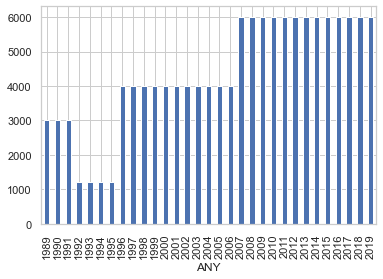

In [7]:
survey.groupby(['ANY']).size().plot.bar()

The sample size has varied over time: from 1989 to 1991 it included 3,000 interviews, from 1992 to 1995 - 1,200, from 1996 to 2006 - 4,000, and since 2007 it includes 6,000 interviews. The dataset is limited to most recent version of the survey, starting from 2007.

In [8]:
survey = survey.query('ANY >= 2007')

In [9]:
survey.shape

(78013, 285)

# 1.2. Subsetting the DataFrame to only relevant columns (survey questions)

In [10]:
# Reading questions dataset with a flag indicating if the question is relevant for further analysis
questions = pd.read_excel('../../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Preguntes_v1_0.xlsx')

In [11]:
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
0,ID,0,IDENTIFICADOR DE L'ENQUESTA,SURVEY IDENTIFIER,numeric
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,1,BARRI,BARRI,factor
4,GRANBARRI,1,GRAN BARRI,GRAN BARRI,factor


In [12]:
questions.shape

(285, 5)

In [13]:
# Filtering out unnecessary questions
questions = questions.query('Flag == 1')
questions.head()

,Nom_variable,Flag,Pregunta,Question,Tipus_variable
1,ANY,1,ANY DE L'ENQUESTA,SURVEY YEAR,numeric
2,NOM_DISTRICTE,1,DISTRICTE MUNICIPAL,DISTRICT,factor
3,NOM_BARRI,1,BARRI,BARRI,factor
4,GRANBARRI,1,GRAN BARRI,GRAN BARRI,factor
6,SEXE,1,SEXE,SEX,factor


In [14]:
questions.shape

(79, 5)

In [15]:
# Dictionary with Catalan and Spanish names/descriptions of questions
df = questions[['Nom_variable', 'Question']]
questions_dict = {}
for i in range(len(df)):
    questions_dict[df.iloc[i].Nom_variable] = df.iloc[i].Question
questions_dict

{'ANY': 'SURVEY YEAR',
 'NOM_DISTRICTE': 'DISTRICT',
 'NOM_BARRI': 'BARRI',
 'GRANBARRI': 'GRAN BARRI',
 'SEXE': 'SEX',
 'EDAT1899_1A6': 'AGE',
 'NACIO_ACT_UE': 'WHAT IS YOUR NATIONALITY?',
 'TMP_RES_BCN_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?',
 'TMP_RES_BARRI_1A6': 'HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?',
 'EVO1A_BCN': 'DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?',
 'FUTUR_BCN': 'FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?',
 'SATISF_RES_BCN_0A10': 'ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?',
 'VAL_GESTMUNI': 'ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?',
 'VAL_ESCOMBRARIES': 'CITY SERVICES - RATE: GARBAGE COLLECTION',
 'VAL_NETEJA': 'CITY SERVICES - RATE: STREETS CLEANING',
 'VAL_SOROLL': 'CITY SERVICES - RATE: NOISE',
 'VAL_VERD'

In [16]:
relevant_questions = list(questions.Nom_variable.unique())

In [17]:
# Filtering the table by choosing only those questions which are relevant for further analysis
survey = survey[relevant_questions]

Potentially relevant questions were preliminary chosen based on the survey questionnaire and metadata with questions available on the Open Data BCN website. Below, the number of NA values for each question marked as "relevant" is being calculated. This way it is checked if questions marked as relevant were used during the whole period of analysis or if they were introduced in the recent editions of the survey. It is being done in order to avoid variables with too many NA values.

In [18]:
temp_dict = {}
temp_dict['Questions'] = survey.columns.tolist()
for year in range(2007,2020):
    temp_list = []
    #print(year)
    df = survey.query('ANY >= @year')
    for i in survey.columns.tolist():
        temp_list.append(df[i].isna().sum())
    temp_dict[year] = temp_list

In [19]:
count_nans = pd.DataFrame.from_dict(temp_dict).set_index('Questions')

In [20]:
count_nans = count_nans.loc[count_nans.index.isin(questions.Nom_variable)]

In [21]:
count_nans[(count_nans.T != 0).any()]

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Questions,,,,,,,,,,,,,
VAL_SOROLL,6000,0,0,0,0,0,0,0,0,0,0,0,0
VAL_TRAM,60013,54013,48000,42000,36000,30000,24000,18000,12000,6000,0,0,0
VAL_BICING,6000,0,0,0,0,0,0,0,0,0,0,0,0
VAL_SPEIS,66013,60013,54000,48000,42000,36000,30000,24000,18000,12000,6000,0,0
VAL_CC,42013,36013,30000,24000,18000,12000,6000,0,0,0,0,0,0
US_APARCA,18013,12013,6000,0,0,0,0,0,0,0,0,0,0
US_TRAM,60013,54013,48000,42000,36000,30000,24000,18000,12000,6000,0,0,0
US_BICING,6000,0,0,0,0,0,0,0,0,0,0,0,0
US_CC,42013,36013,30000,24000,18000,12000,6000,0,0,0,0,0,0


In [22]:
count_nans[(count_nans.T != 0).any()].shape

(17, 13)

17 out of 79 questions marked as relevant have some NA values during the period of analysis. After examining the number of NAs, the analysis period is being limited to 2008-2019 (to be able to include variable VAL_SOROLL) and remaining variables with NA values are removed from the analysis. (Statistical significance of MUNI_VOTAR was checked during the process of model fitting and it can be removed from the analysis, as it was not significant.)

In [23]:
survey = survey.query('ANY == 2019').dropna(axis='columns')

In [24]:
survey.head()

,ANY,NOM_DISTRICTE,NOM_BARRI,GRANBARRI,SEXE,EDAT1899_1A6,NACIO_ACT_UE,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,...,LLAR_INGRESSOS_1A10,PROB_LLAR_ECON_1A6,SENTPERTI,LLOC_NAIX_1A4,LLENGUA_HAB,ESTUDIS_1A6,RESUM_PARENTIU,HAB_RES_1A4,TE_CERT_DISCAP,HAB_CERT_DISC
129813,2019,SANTS - MONTJUÏC,EL POBLE SEC,EL POBLE SEC,HOME,DE 25 A 34 ANYS,ESPANYOLA,MÉS DE 2 ANYS I FINS A 5 ANYS,MÉS DE 2 ANYS I FINS A 5 ANYS,HA EMPITJORAT,...,DE 500 A 1.000 EUROS,AMB CERTA DIFICULTAT,ÚNICAMENT CATALÀ,RESTA D'ESPANYA,CASTELLÀ,UNIVERSITARIS,ALTRES SITUACIONS,TRES,NO,NO
129814,2019,SANTS - MONTJUÏC,EL POBLE SEC,EL POBLE SEC,HOME,DE 35 A 44 ANYS,RESTA PAÏSOS,MÉS DE 10 ANYS,MÉS DE 5 ANYS I FINS A 10 ANYS,HA EMPITJORAT,...,NO CONTESTA,AMB CERTA DIFICULTAT,TAN ESPANYOL COM CATALÀ,ESTRANGER,CASTELLÀ,POST UNIVERSITARIS,PARELLA AMB FILLS,QUATRE O MÉS,NO CONTESTA,NO
129815,2019,SANTS - MONTJUÏC,LA FONT DE LA GUATLLA,"LA FONT DE LA GUATLLA, HOSTAFRANCS I LA BORDETA",HOME,DE 35 A 44 ANYS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,MÉS DE 5 ANYS I FINS A 10 ANYS,HA MILLORAT,...,DE 500 A 1.000 EUROS,AMB MOLTA DIFICULTAT,TAN ESPANYOL COM CATALÀ,BARCELONA CIUTAT,CATALÀ,SECUNDARIS GENERALS,PERSONA SOLA,UNA,NO,NO
129816,2019,SANTS - MONTJUÏC,SANTS,SANTS I SANTS-BADAL,HOME,DE 65 ANYS I MÉS,ESPANYOLA,MÉS DE 10 ANYS,MÉS DE 10 ANYS,ESTÀ IGUAL,...,DE 3.001 A 5.000 EUROS,AMB FACILITAT,ÚNICAMENT CATALÀ,ESTRANGER,CATALÀ,SECUNDARIS GENERALS,PARELLA SOLA,DUES,NO,NO
129817,2019,SANTS - MONTJUÏC,SANTS,SANTS I SANTS-BADAL,HOME,DE 35 A 44 ANYS,ESPANYOLA,SEMPRE HA VISCUT A LA CIUTAT,MÉS DE 5 ANYS I FINS A 10 ANYS,HA EMPITJORAT,...,DE 3.001 A 5.000 EUROS,AMB CERTA FACILITAT,TAN ESPANYOL COM CATALÀ,BARCELONA CIUTAT,CATALÀ,POST UNIVERSITARIS,PARELLA SOLA,DUES,NO,NO


In [25]:
survey.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'VAL_GESTMUNI',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'US_VERD',
 'US_APARCA',
 'US_BUS',
 'US_METRO',
 'US_TRAM',
 'US_BICING',
 'US_ESPORT',
 'US_SIAC',
 'US_CSS',
 'US_CULT',
 'US_FESTESPOP',
 'US_MERCAT',
 'US_BIBLIO',
 'US_CC',
 'TRANSP_MOU',
 'VAL_TRANSP_1A5',
 'VAL_TRANSP_BARRI_1A5',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_0A10',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI',
 'US_ASSOCIA_BARRI',
 'HAB_COTXE_PART',
 'HAB_TREBDOM',
 

Now the dataset includes 77 variables.

In [26]:
# Reading responses dataset with a flag indicating if the response relates to the question
# which was tagged as relevant for further analysis or not
responses = pd.read_excel('../../data/survey/survey_filtered/2019_r19006_ESM_Evolucio_BDD_Metainformacio_Respostes_v1_0.xlsx')

In [27]:
responses.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [28]:
responses.shape

(4529, 4)

In [29]:
responses = responses.query('Flag == 1')
responses.head()

,Nom_variable,Flag,Resposta,Answer
0,NOM_DISTRICTE,1,CIUTAT VELLA,CIUTAT VELLA
1,NOM_DISTRICTE,1,EIXAMPLE,EIXAMPLE
2,NOM_DISTRICTE,1,SANTS - MONTJUÏC,SANTS - MONTJUÏC
3,NOM_DISTRICTE,1,LES CORTS,LES CORTS
4,NOM_DISTRICTE,1,SARRIÀ - SANT GERVASI,SARRIÀ - SANT GERVASI


In [30]:
responses.shape

(783, 4)

# 1.3. Translating the data from Catalan to English

As the survey was conducted in Catalan or Spanish and the answers are recorded in Catalan it needs to be translated into English for better understanding of the responses. The survey was initially translated on metadata tables with questions (*Preguntas*) and answers (*Respostes*). Below, I create a dictionary *translating_responses* with question name (*Nom_variable*) as a key and *temp_dict* as a value. *Temp_dict* is a nested dictionary, with Catalan answer as a key and English translation of this answer as a value.

In [31]:
translating_responses = {}
for i in responses.Nom_variable.unique():
    temp_dict = {}
    temp_dict[str(np.nan)] = np.nan
    df = responses.query('Nom_variable == @i')
    for j in range(len(df)):
        temp_dict[str(df.iloc[j].Resposta)] = df.iloc[j].Answer
    translating_responses[i] = temp_dict

In [32]:
survey['VAL_BUS'].unique()

array(['7', '9', '8', 'NO HO SAP', '6', '10 = EXCEL·LENT GESTIÓ', '5',
       '0 = PÈSSIMA GESTIÓ', '4', '3', '1', '2', 'NO CONTESTA'],
      dtype=object)

In [33]:
translating_responses['VAL_BUS']

{'nan': nan,
 '0 = PÈSSIMA GESTIÓ': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10 = EXCEL·LENT GESTIÓ': 10,
 'NO HO SAP': "I DON'T KNOW",
 'NO CONTESTA': 'NO ANSWER'}

In [34]:
# Using a for loop, the survey is being translated by replacing Catalan version of an answer
# with its English translation using translating_answers dictionary created above.
for column in [i for i in list(survey.columns) if i not in ["ANY", "COST_LLOGUER_NRE", "COST_ESPAI_NRE"]]:
    translate = translating_responses[column]
    for i in survey[column].unique():
        survey[column].replace(i, translate[str(i)], inplace=True)

In [35]:
survey['VAL_BUS'].unique()

array([7, 9, 8, "I DON'T KNOW", 6, 10, 5, 0, 4, 3, 1, 2, 'NO ANSWER'],
      dtype=object)

# 1.4. Subsetting the data to responses of people aged 65+ 

In [36]:
survey.shape

(6000, 77)

In [37]:
survey.groupby(['EDAT1899_1A6']).size()

EDAT1899_1A6
65 YEARS AND OVER      1482
FROM 18 TO 24 YEARS     475
FROM 25 TO 34 YEARS    1037
FROM 35 TO 44 YEARS    1148
FROM 45 TO 54 YEARS    1015
FROM 55 TO 64 YEARS     843
dtype: int64

In [38]:
round(survey.groupby(['EDAT1899_1A6']).size() / survey.groupby(['EDAT1899_1A6']).size().sum() * 100,2)

EDAT1899_1A6
65 YEARS AND OVER      24.70
FROM 18 TO 24 YEARS     7.92
FROM 25 TO 34 YEARS    17.28
FROM 35 TO 44 YEARS    19.13
FROM 45 TO 54 YEARS    16.92
FROM 55 TO 64 YEARS    14.05
dtype: float64

In [39]:
survey_65 = survey.query('EDAT1899_1A6 == "65 YEARS AND OVER"')

In [40]:
survey_65.shape

(1482, 77)

In [41]:
# Creating a copy of the data subset for further data preparation and features generation
data = survey_65.copy()

In [42]:
survey_65.shape, data.shape

((1482, 77), (1482, 77))

# 1.5. Data preparation

Below, number of functions is defined and used to perform basic exploratory data analysis of each variable. It has functions for calculating numeric and percentage distribution of responses, displaying crosstab of independent variables levels vs dependent variable levels, as well as printing distribution plots. 

In [43]:
def size_num(var):
    return data.groupby([var]).size()

def size_pctg(var):
    return round(data.groupby([var]).size() / data.groupby([var]).size().sum() * 100,2)

def ctab(var):
    return pd.crosstab(data[var], data.Would_live_in_another_neighborhood)

def simple_plot(var):
    df = pd.DataFrame(data.groupby([var]).size()).reset_index().rename(columns= {var: 'x', 0: 'y'})
    if var != 'ANY' and var[:3] != 'VAL' and var[:3] != 'EVO' and var[:5] != 'FUTUR' and var[:6] != 'SATISF':
        df = df.sort_values(by='y', ascending=False)
    plt.figure(figsize=(12,4))
    plt.bar(df['x'].astype(str), df['y'])
    plt.xticks(rotation='vertical')
    for i in range(len(df)):
        plt.annotate(df['y'][i], xy=(str(df['x'][i]),df['y'][i]), ha='center', va='bottom')
    plt.show()

def grouped_plot(var):
    table = pd.crosstab(data[var], data.Would_live_in_another_neighborhood)
    return table.plot(kind='bar')

def stacked_plot(var):
    table = pd.crosstab(data[var], data.Would_live_in_another_neighborhood)
    return table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

## 1.5.1 Dependent variable

Survey question: IF YOU HAD THE POSSIBILITY AND THE RESOURCES TO CHANGE YOUR RESIDENCE, WHERE WOULD YOU LIVE?

In [44]:
y = 'CANVI_LLOC_RES_1A3'

In [45]:
size_num(y)

CANVI_LLOC_RES_1A3
I DON'T KNOW                                           19
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA     164
I WOULD LIVE OUTSIDE BARCELONA                        234
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         1065
dtype: int64

In [46]:
size_pctg(y)

CANVI_LLOC_RES_1A3
I DON'T KNOW                                          1.28
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA    11.07
I WOULD LIVE OUTSIDE BARCELONA                       15.79
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         71.86
dtype: float64

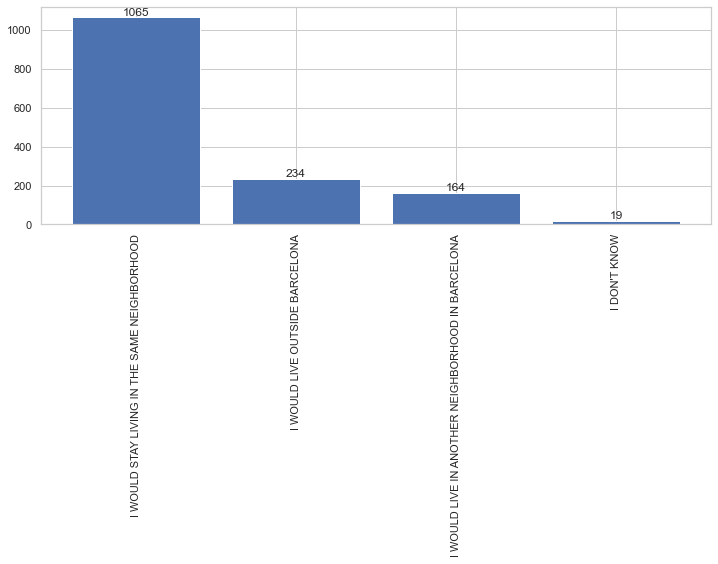

In [47]:
simple_plot(y)

In [48]:
data_prep = {'I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD': 0,
            'I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA': 1,
             'I WOULD LIVE OUTSIDE BARCELONA': np.nan,
             "I DON'T KNOW": np.nan,
             'NO ANSWER': np.nan
            }
data['Would_live_in_another_neighborhood'] = [data_prep[i] for i in data[y]]

In [49]:
count_stay = len(data[data['Would_live_in_another_neighborhood']==0])
count_move = len(data[data['Would_live_in_another_neighborhood']==1])
pct_of_stay = count_stay/(count_stay + count_move)
pct_of_move = count_move/(count_stay + count_move)

print("Number of elderly who would change their neighborhood or move out from the city:", count_move)
print("Number of elderly who would stay in their neighborhood:", count_stay)
print("Percentage of elderly who would change their neighborhood or move out from the city:", round(pct_of_move*100,2), '%')
print("Percentage of elderly who would stay in their neighborhood:", round(pct_of_stay*100,2), '%')

Number of elderly who would change their neighborhood or move out from the city: 164
Number of elderly who would stay in their neighborhood: 1065
Percentage of elderly who would change their neighborhood or move out from the city: 13.34 %
Percentage of elderly who would stay in their neighborhood: 86.66 %


## 1.5.2 Independent variables

First insight into the dataset using cross tabulation of dependent variable and different features:

In [50]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'VAL_GESTMUNI',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'US_VERD',
 'US_APARCA',
 'US_BUS',
 'US_METRO',
 'US_TRAM',
 'US_BICING',
 'US_ESPORT',
 'US_SIAC',
 'US_CSS',
 'US_CULT',
 'US_FESTESPOP',
 'US_MERCAT',
 'US_BIBLIO',
 'US_CC',
 'TRANSP_MOU',
 'VAL_TRANSP_1A5',
 'VAL_TRANSP_BARRI_1A5',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_0A10',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI',
 'US_ASSOCIA_BARRI',
 'HAB_COTXE_PART',
 'HAB_TREBDOM',
 

In [51]:
for i in data.columns.tolist():
    display(ctab(i))

Would_live_in_another_neighborhood,0.0,1.0
ANY,,
2019,1065,164


Would_live_in_another_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,63,8
EIXAMPLE,185,20
GRÀCIA,89,12
HORTA - GUINARDÓ,115,22
LES CORTS,112,4
NOU BARRIS,98,28
SANT ANDREU,85,23
SANT MARTÍ,134,18
SANTS - MONTJUÏC,86,24


Would_live_in_another_neighborhood,0.0,1.0
NOM_BARRI,,
BARÓ DE VIVER,2,1
CAN BARÓ,6,2
CAN PEGUERA,1,1
CANYELLES,8,0
CIUTAT MERIDIANA,6,3
...,...,...
VALLBONA,0,1
VALLCARCA I ELS PENITENTS,13,1
"VALLVIDRERA, EL TIBIDABO I LES PLANES",3,0


Would_live_in_another_neighborhood,0.0,1.0
GRANBARRI,,
"CANYELLES, LES ROQUETES I LA TRINITAT NOVA",21,8
EL BARRI GÒTIC,17,1
"EL BESÒS, EL MARESME I PROVENÇALS",15,7
EL CAMP D'EN GRASSOT I GRÀCIA NOVA,35,4
EL CARMEL I CAN BARÓ,25,7
EL CLOT I EL CAMP DE L'ARPA,30,0
EL FORT PIENC,31,3
EL GUINARDÓ,18,7
"EL PARC, LA LLACUNA I LA VILA OLÍMPICA",25,3


Would_live_in_another_neighborhood,0.0,1.0
SEXE,,
MAN,416,63
WOMAN,649,101


Would_live_in_another_neighborhood,0.0,1.0
EDAT1899_1A6,,
65 YEARS AND OVER,1065,164


Would_live_in_another_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,15,2
REMAINING COUNTRIES,13,5
SPANISH,1037,157


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BCN_1A6,,
FROM 6 MONTHS TO 2 YEARS,6,6
I HAVE ALWAYS LIVED IN THE CITY,455,70
MORE THAN 10 YEARS,589,87
MORE THAN 2 YEARS AND UP TO 5 YEARS,7,1
MORE THAN 5 YEARS AND UP TO 10 YEARS,8,0


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,10,6
I HAVE ALWAYS LIVED IN THE BARRI,144,7
LESS THAN SIX MONTHS,4,1
MORE THAN 10 YEARS,862,139
MORE THAN 2 YEARS AND UP TO 5 YEARS,13,5
MORE THAN 5 YEARS AND UP TO 10 YEARS,32,6


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,34,4
IT HAS IMPROVED,286,38
IT'S THE SAME,204,31
IT'S WORSE,540,90
NO ANSWER,1,1


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,210,23
IT WILL GET WORSE,244,35
IT WILL IMPROVE,569,96
IT WILL STAY THE SAME,40,9
NO ANSWER,2,1


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BCN_0A10,,
0,3,1
2,2,0
3,3,0
4,10,4
5,57,8
6,58,11
7,130,27
8,312,49
9,161,18


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTMUNI,,
0,25,8
1,8,2
2,19,7
3,49,6
4,87,11
5,224,41
6,184,40
7,209,21
8,167,14


Would_live_in_another_neighborhood,0.0,1.0
VAL_ESCOMBRARIES,,
0,11,2
1,3,1
2,10,0
3,16,1
4,32,7
5,98,11
6,98,24
7,202,27
8,352,57


Would_live_in_another_neighborhood,0.0,1.0
VAL_NETEJA,,
0,28,6
1,5,1
2,33,3
3,48,8
4,80,18
5,151,24
6,146,29
7,190,30
8,253,28


Would_live_in_another_neighborhood,0.0,1.0
VAL_SOROLL,,
0,28,10
1,15,1
2,32,5
3,48,13
4,88,19
5,185,20
6,143,23
7,167,28
8,188,24


Would_live_in_another_neighborhood,0.0,1.0
VAL_VERD,,
0,24,12
1,9,0
2,25,4
3,48,6
4,68,15
5,163,34
6,140,26
7,204,16
8,221,31


Would_live_in_another_neighborhood,0.0,1.0
VAL_ENLLUM,,
0,15,2
1,3,1
2,7,3
3,28,6
4,50,10
5,115,17
6,144,24
7,225,41
8,312,36


Would_live_in_another_neighborhood,0.0,1.0
VAL_URBA,,
0,19,5
1,2,1
2,14,1
3,41,8
4,61,9
5,136,23
6,145,31
7,207,36
8,205,27


Would_live_in_another_neighborhood,0.0,1.0
VAL_ASFALT,,
0,36,10
1,6,2
2,30,3
3,57,13
4,118,15
5,182,29
6,155,27
7,196,33
8,187,22


Would_live_in_another_neighborhood,0.0,1.0
VAL_FACANES,,
0,17,0
1,4,1
2,12,1
3,16,4
4,40,3
5,154,18
6,149,38
7,234,33
8,233,37


Would_live_in_another_neighborhood,0.0,1.0
VAL_CIRCUL,,
0,38,6
1,11,1
2,35,6
3,76,13
4,115,16
5,195,37
6,174,28
7,156,22
8,145,26


Would_live_in_another_neighborhood,0.0,1.0
VAL_APARCA,,
0,120,25
1,22,7
2,76,8
3,121,28
4,148,21
5,148,17
6,89,11
7,77,6
8,55,9


Would_live_in_another_neighborhood,0.0,1.0
VAL_BUS,,
0,20,4
1,10,0
2,10,4
3,27,6
4,48,8
5,79,13
6,91,16
7,182,27
8,296,50


Would_live_in_another_neighborhood,0.0,1.0
VAL_METRO,,
0,2,0
1,3,0
2,1,2
3,4,0
4,11,2
5,43,7
6,92,15
7,167,27
8,344,63


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRAM,,
0,7,3
1,2,0
2,3,1
3,6,1
4,9,3
5,39,5
6,40,7
7,99,12
8,125,22


Would_live_in_another_neighborhood,0.0,1.0
VAL_BICING,,
0,60,9
1,9,2
2,18,6
3,27,3
4,36,5
5,71,8
6,51,9
7,76,19
8,106,13


Would_live_in_another_neighborhood,0.0,1.0
VAL_GUB,,
0,43,6
1,7,2
2,23,5
3,47,14
4,59,11
5,138,27
6,128,17
7,155,20
8,189,26


Would_live_in_another_neighborhood,0.0,1.0
VAL_SPEIS,,
0,4,0
2,3,1
3,2,3
4,7,2
5,28,7
6,48,6
7,102,11
8,240,26
9,154,33


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR,,
0,52,14
1,15,0
2,52,13
3,84,16
4,154,26
5,194,27
6,161,24
7,145,18
8,103,14


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR_BARRI,,
0,44,14
1,11,3
2,35,10
3,67,16
4,103,22
5,158,24
6,154,20
7,166,26
8,193,20


Would_live_in_another_neighborhood,0.0,1.0
VAL_ESPORT,,
0,21,4
1,2,0
2,8,2
3,17,6
4,28,8
5,75,11
6,70,16
7,143,19
8,161,23


Would_live_in_another_neighborhood,0.0,1.0
VAL_SIAC,,
0,17,4
1,1,1
2,14,2
3,18,4
4,27,6
5,62,13
6,103,10
7,177,26
8,196,33


Would_live_in_another_neighborhood,0.0,1.0
VAL_CSS,,
0,20,5
1,1,1
2,9,1
3,15,4
4,23,1
5,49,15
6,63,18
7,123,16
8,166,22


Would_live_in_another_neighborhood,0.0,1.0
VAL_CULT,,
0,1,1
2,3,1
3,7,5
4,16,5
5,51,12
6,86,12
7,151,30
8,263,33
9,72,11


Would_live_in_another_neighborhood,0.0,1.0
VAL_FESTESPOP,,
0,10,5
1,1,0
2,10,1
3,22,2
4,29,11
5,83,12
6,91,17
7,173,31
8,228,25


Would_live_in_another_neighborhood,0.0,1.0
VAL_MERCAT,,
0,12,1
1,4,1
2,6,3
3,14,0
4,26,7
5,75,10
6,73,12
7,187,28
8,312,49


Would_live_in_another_neighborhood,0.0,1.0
VAL_BIBLIO,,
0,3,0
1,1,0
2,2,0
3,2,0
4,9,1
5,36,5
6,39,9
7,112,13
8,224,39


Would_live_in_another_neighborhood,0.0,1.0
VAL_CC,,
0,2,4
2,3,0
3,4,1
4,5,2
5,31,4
6,43,3
7,142,25
8,230,29
9,95,9


Would_live_in_another_neighborhood,0.0,1.0
US_VERD,,
DO NOT USE,355,56
USE,710,108


Would_live_in_another_neighborhood,0.0,1.0
US_APARCA,,
DO NOT USE,838,124
NO ANSWER,4,0
USE,223,40


Would_live_in_another_neighborhood,0.0,1.0
US_BUS,,
DO NOT USE,161,16
USE,904,148


Would_live_in_another_neighborhood,0.0,1.0
US_METRO,,
DO NOT USE,303,44
NO ANSWER,1,0
USE,761,120


Would_live_in_another_neighborhood,0.0,1.0
US_TRAM,,
DO NOT USE,912,142
NO ANSWER,10,0
USE,143,22


Would_live_in_another_neighborhood,0.0,1.0
US_BICING,,
DO NOT USE,1040,159
NO ANSWER,5,0
USE,20,5


Would_live_in_another_neighborhood,0.0,1.0
US_ESPORT,,
DO NOT USE,852,131
NO ANSWER,10,0
USE,203,33


Would_live_in_another_neighborhood,0.0,1.0
US_SIAC,,
DO NOT USE,588,80
NO ANSWER,6,0
USE,471,84


Would_live_in_another_neighborhood,0.0,1.0
US_CSS,,
DO NOT USE,720,108
NO ANSWER,6,0
USE,339,56


Would_live_in_another_neighborhood,0.0,1.0
US_CULT,,
DO NOT USE,633,95
NO ANSWER,6,0
USE,426,69


Would_live_in_another_neighborhood,0.0,1.0
US_FESTESPOP,,
DO NOT USE,605,98
NO ANSWER,3,0
USE,457,66


Would_live_in_another_neighborhood,0.0,1.0
US_MERCAT,,
DO NOT USE,276,54
USE,789,110


Would_live_in_another_neighborhood,0.0,1.0
US_BIBLIO,,
DO NOT USE,679,96
NO ANSWER,6,1
USE,380,67


Would_live_in_another_neighborhood,0.0,1.0
US_CC,,
DO NOT USE,666,113
NO ANSWER,8,0
USE,391,51


Would_live_in_another_neighborhood,0.0,1.0
TRANSP_MOU,,
BICYCLE,6,0
BICYCLE (BICING),1,2
BUS,484,82
CAR,53,7
METRO / CATALAN RAILWAYS (FGC) URBAN,332,54
MOTORCYCLE,9,2
OTHERS,4,1
TAXI,39,1
TRAIN (RENFE / FGC INTERURBAN),2,0


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_1A5,,
I DON'T KNOW,25,3
LITTLE EQUIPPED,97,18
NORMAL,83,8
NOTHING EQUIPPED,4,3
PRETTY EQUIPPED,676,98
VERY GIFTED,180,34


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A5,,
I DON'T KNOW,6,2
LITTLE EQUIPPED,139,17
NORMAL,55,13
NOTHING EQUIPPED,18,7
PRETTY EQUIPPED,585,86
VERY GIFTED,262,39


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,13,2
IT HAS IMPROVED,426,62
IT'S THE SAME,385,51
IT'S WORSE,241,49


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,191,29
IT WILL GET WORSE,165,34
IT WILL IMPROVE,596,82
IT WILL STAY THE SAME,112,19
NO ANSWER,1,0


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BARRI_0A10,,
0,0,2
2,0,6
3,1,2
4,3,5
5,24,11
6,51,11
7,102,29
8,329,56
9,242,19


Would_live_in_another_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,28,5
"NEITHER THE BEST, NOR THE WORST",330,95
NO ANSWER,1,0
ONE OF THE BEST,676,43
ONE OF THE WORST,30,21


Would_live_in_another_neighborhood,0.0,1.0
CANVI_LLOC_RES_1A3,,
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA,0,164
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD,1065,0


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTBARRI,,
0,21,8
1,2,1
2,21,5
3,23,5
4,67,10
5,149,28
6,157,38
7,208,25
8,225,18


Would_live_in_another_neighborhood,0.0,1.0
US_ASSOCIA_BARRI,,
NO,840,135
NO ANSWER,0,1
YES,225,28


Would_live_in_another_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T WANT / I DON'T NEED,423,54
IT'S NOT POSSIBLE,76,15
YES,566,95


Would_live_in_another_neighborhood,0.0,1.0
HAB_TREBDOM,,
I DON'T WANT / I DON'T NEED,506,81
IT'S NOT POSSIBLE,186,36
NO ANSWER,0,1
YES,373,46


Would_live_in_another_neighborhood,0.0,1.0
HAB_REGIM_1A5,,
ANOTHER SITUATION,1,0
IN FREE ASSIGNMENT,11,2
NO ANSWER,1,0
OWN,836,132
RENT A WHOLE PLACE,216,30


Would_live_in_another_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,48,7
FROM 111 TO 120 M2,28,1
FROM 121 TO 130 M2,25,4
FROM 131 TO 140 M2,15,1
FROM 141 TO 150 M2,12,2
FROM 151 TO 160 M2,8,0
FROM 161 TO 170 M2,10,1
FROM 51 TO 60 M2,116,22
FROM 61 TO 70 M2,214,26


Would_live_in_another_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",221,30
"FROM 1,501 TO 2,000 EUROS",155,29
"FROM 2,001 TO 2,500 EUROS",116,17
"FROM 2,501 TO 3,000 EUROS",67,9
"FROM 3,001 TO 5,000 EUROS",73,8
"FROM 5,001 TO 7,000 EUROS",15,1
"FROM 500 TO 1,000 EUROS",187,31
"FROM 7,001 TO 9,000 EUROS",3,0
I DON'T KNOW,77,7


Would_live_in_another_neighborhood,0.0,1.0
PROB_LLAR_ECON_1A6,,
EASILY,273,48
I DON'T KNOW,5,0
NO ANSWER,11,3
RELATIVELY EASILY,325,41
VERY EASILY,48,6
WITH A LOT OF DIFFICULTY,58,10
WITH DIFFICULTY,116,25
WITH SOME DIFFICULTY,229,31


Would_live_in_another_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",396,47
I DON'T KNOW,13,1
MORE CATALAN THAN SPANISH,257,49
MORE SPANISH THAN CATALAN,47,11
NO ANSWER,21,4
ONLY CATALAN,237,33
ONLY SPANISH,71,14
OTHER,23,5


Would_live_in_another_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,501,78
FOREIGN,66,11
NO ANSWER,2,0
REST OF CATALONIA,135,19
REST OF SPAIN,361,56


Would_live_in_another_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,566,86
NO ANSWER,1,0
OTHER,9,2
SPANISH,489,76


Would_live_in_another_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES HAVE NOT FINISHED,76,11
GENERAL SECONDARY,141,29
MANDATORY,399,63
NO ANSWER,3,0
POST UNIVERSITY,60,6
PROFESSIONAL SECONDARY,201,25
UNIVERSITY,185,30


Would_live_in_another_neighborhood,0.0,1.0
RESUM_PARENTIU,,
COUPLE WITH CHILDREN,99,15
COUPLE WITH NO CHILDREN,465,70
OTHER FAMILY,34,9
OTHER SITUATIONS,15,3
SINGLE,378,55
SINGLE-PARENT WITH CHILDREN,74,12


Would_live_in_another_neighborhood,0.0,1.0
HAB_RES_1A4,,
FOUR OR MORE,34,10
ONE,378,55
THREE,107,15
TWO,546,84


Would_live_in_another_neighborhood,0.0,1.0
TE_CERT_DISCAP,,
NO,889,127
NO ANSWER,2,0
YES,174,37


Would_live_in_another_neighborhood,0.0,1.0
HAB_CERT_DISC,,
NO,755,110
YES,310,54


Would_live_in_another_neighborhood,0.0,1.0
Would_live_in_another_neighborhood,,
0.0,1065,0
1.0,0,164


In [52]:
for i in data.columns.tolist():
    display(size_pctg(i))

ANY
2019    100.0
dtype: float64

NOM_DISTRICTE
CIUTAT VELLA              6.55
EIXAMPLE                 15.65
GRÀCIA                    7.96
HORTA - GUINARDÓ         11.54
LES CORTS                 8.91
NOU BARRIS               10.93
SANT ANDREU               8.30
SANT MARTÍ               12.28
SANTS - MONTJUÏC          9.58
SARRIÀ - SANT GERVASI     8.30
dtype: float64

NOM_BARRI
BARÓ DE VIVER                            0.20
CAN BARÓ                                 0.61
CAN PEGUERA                              0.13
CANYELLES                                0.81
CIUTAT MERIDIANA                         1.08
                                         ... 
VALLBONA                                 0.13
VALLCARCA I ELS PENITENTS                1.15
VALLVIDRERA, EL TIBIDABO I LES PLANES    0.20
VERDUN                                   0.67
VILAPICINA I LA TORRE LLOBETA            1.28
Length: 72, dtype: float64

GRANBARRI
CANYELLES, LES ROQUETES I LA TRINITAT NOVA              2.63
EL BARRI GÒTIC                                          1.55
EL BESÒS, EL MARESME I PROVENÇALS                       2.16
EL CAMP D'EN GRASSOT I GRÀCIA NOVA                      2.90
EL CARMEL I CAN BARÓ                                    2.77
EL CLOT I EL CAMP DE L'ARPA                             2.63
EL FORT PIENC                                           2.56
EL GUINARDÓ                                             2.70
EL PARC, LA LLACUNA I LA VILA OLÍMPICA                  2.23
EL POBLE SEC                                            2.02
EL POBLENOU I DIAGONAL MAR                              2.09
EL RAVAL                                                1.42
ELS BARRIS DE LA VALL D'HEBRON                          2.90
HORTA I LA FONT D'EN FARGUES                            3.17
L'ANTIGA ESQUERRA DE L'EIXAMPLE                         2.56
LA BARCELONETA                                          1.96
LA DRETA DE L'

SEXE
MAN      40.28
WOMAN    59.72
dtype: float64

EDAT1899_1A6
65 YEARS AND OVER    100.0
dtype: float64

NACIO_ACT_UE
OTHER EU                1.15
REMAINING COUNTRIES     1.28
SPANISH                97.57
dtype: float64

TMP_RES_BCN_1A6
FROM 6 MONTHS TO 2 YEARS                 0.94
I HAVE ALWAYS LIVED IN THE CITY         41.03
MORE THAN 10 YEARS                      56.61
MORE THAN 2 YEARS AND UP TO 5 YEARS      0.74
MORE THAN 5 YEARS AND UP TO 10 YEARS     0.67
dtype: float64

TMP_RES_BARRI_1A6
FROM 6 MONTHS TO 2 YEARS                 1.48
I HAVE ALWAYS LIVED IN THE BARRI        11.81
LESS THAN SIX MONTHS                     0.40
MORE THAN 10 YEARS                      81.58
MORE THAN 2 YEARS AND UP TO 5 YEARS      1.62
MORE THAN 5 YEARS AND UP TO 10 YEARS     3.10
dtype: float64

EVO1A_BCN
I DON'T KNOW        3.10
IT HAS IMPROVED    25.24
IT'S THE SAME      19.77
IT'S WORSE         51.75
NO ANSWER           0.13
dtype: float64

FUTUR_BCN
I DON'T KNOW             19.57
IT WILL GET WORSE        23.41
IT WILL IMPROVE          52.43
IT WILL STAY THE SAME     4.32
NO ANSWER                 0.27
dtype: float64

SATISF_RES_BCN_0A10
0                0.47
2                0.40
3                0.74
4                1.48
5                7.02
6                6.61
7               13.77
8               27.67
9               13.56
10              28.00
I DON'T KNOW     0.27
dtype: float64

VAL_GESTMUNI
0                3.58
1                0.94
2                2.09
3                4.45
4                8.43
5               22.27
6               18.02
7               18.02
8               13.77
9                3.78
10               2.70
I DON'T KNOW     1.96
dtype: float64

VAL_ESCOMBRARIES
0                1.15
1                0.27
2                0.81
3                1.48
4                3.51
5                9.38
6                9.72
7               19.16
8               31.85
9               11.67
10              10.59
I DON'T KNOW     0.40
dtype: float64

VAL_NETEJA
0                3.17
1                0.61
2                2.97
3                4.86
4                8.37
5               14.10
6               14.37
7               17.61
8               21.79
9                6.21
10               5.47
I DON'T KNOW     0.47
dtype: float64

VAL_SOROLL
0                4.12
1                1.28
2                3.04
3                5.60
4                8.97
5               16.06
6               13.83
7               15.52
8               16.33
9                5.53
10               4.25
I DON'T KNOW     5.40
NO ANSWER        0.07
dtype: float64

VAL_VERD
0                3.64
1                0.74
2                2.29
3                4.99
4                6.14
5               16.46
6               13.56
7               17.95
8               19.91
9                5.47
10               4.52
I DON'T KNOW     4.18
NO ANSWER        0.13
dtype: float64

VAL_ENLLUM
0                1.69
1                0.27
2                1.01
3                2.56
4                4.79
5               11.47
6               13.70
7               21.86
8               27.13
9                6.61
10               6.41
I DON'T KNOW     2.43
NO ANSWER        0.07
dtype: float64

VAL_URBA
0                2.09
1                0.20
2                1.55
3                4.12
4                5.94
5               12.96
6               14.44
7               19.50
8               18.15
9                4.05
10               3.51
I DON'T KNOW    13.43
NO ANSWER        0.07
dtype: float64

VAL_ASFALT
0                3.71
1                0.54
2                2.97
3                6.34
4               11.20
5               17.07
6               15.18
7               17.88
8               16.46
9                3.85
10               3.10
I DON'T KNOW     1.69
dtype: float64

VAL_FACANES
0                1.75
1                0.40
2                1.08
3                1.96
4                3.71
5               14.71
6               15.18
7               21.39
8               21.32
9                4.66
10               3.64
I DON'T KNOW     9.72
NO ANSWER        0.47
dtype: float64

VAL_CIRCUL
0                3.91
1                1.15
2                3.58
3                7.29
4               10.86
5               19.03
6               16.94
7               14.10
8               13.23
9                2.36
10               2.29
I DON'T KNOW     5.20
NO ANSWER        0.07
dtype: float64

VAL_APARCA
0               12.55
1                2.43
2                6.68
3               13.16
4               13.70
5               13.09
6                7.83
7                6.68
8                4.66
9                0.94
10               0.67
I DON'T KNOW    17.27
NO ANSWER        0.34
dtype: float64

VAL_BUS
0                1.96
1                0.81
2                1.28
3                2.90
4                4.72
5                7.49
6                9.11
7               16.87
8               28.14
9               12.21
10               9.04
I DON'T KNOW     5.40
NO ANSWER        0.07
dtype: float64

VAL_METRO
0                0.27
1                0.27
2                0.20
3                0.47
4                1.21
5                3.98
6                8.37
7               16.67
8               32.59
9               13.90
10              10.53
I DON'T KNOW    11.40
NO ANSWER        0.13
dtype: float64

VAL_TRAM
0                0.81
1                0.13
2                0.47
3                0.61
4                0.81
5                3.58
6                3.91
7                8.30
8               11.88
9                4.45
10               3.17
I DON'T KNOW    61.54
NO ANSWER        0.34
dtype: float64

VAL_BICING
0                6.01
1                0.88
2                2.09
3                2.63
4                3.51
5                6.34
6                4.86
7                7.76
8                8.91
9                3.58
10               2.77
I DON'T KNOW    50.34
NO ANSWER        0.34
dtype: float64

VAL_GUB
0                4.18
1                0.67
2                2.23
3                4.93
4                5.74
5               13.56
6               12.28
7               14.37
8               17.07
9                5.60
10               5.13
I DON'T KNOW    13.97
NO ANSWER        0.27
dtype: float64

VAL_SPEIS
0                0.40
2                0.47
3                0.54
4                1.08
5                2.70
6                3.98
7                9.04
8               21.59
9               15.52
10              17.27
I DON'T KNOW    27.40
dtype: float64

VAL_SEGUR
0                6.07
1                1.48
2                5.67
3                8.16
4               15.65
5               17.54
6               14.71
7               12.69
8                8.97
9                2.36
10               2.09
I DON'T KNOW     4.39
NO ANSWER        0.20
dtype: float64

VAL_SEGUR_BARRI
0                5.67
1                1.35
2                3.85
3                6.55
4               10.86
5               14.84
6               14.37
7               15.45
8               16.46
9                5.06
10               3.51
I DON'T KNOW     1.96
NO ANSWER        0.07
dtype: float64

VAL_ESPORT
0                2.29
1                0.20
2                0.88
3                2.23
4                3.10
5                6.61
6                7.29
7               13.36
8               14.57
9                4.66
10               3.71
I DON'T KNOW    41.03
NO ANSWER        0.07
dtype: float64

VAL_SIAC
0                1.69
1                0.20
2                1.15
3                1.89
4                2.77
5                6.75
6                9.11
7               16.46
8               18.69
9                7.96
10               6.82
I DON'T KNOW    26.52
dtype: float64

VAL_CSS
0                2.09
1                0.20
2                0.81
3                1.62
4                2.09
5                5.20
6                6.41
7               11.07
8               14.98
9                5.74
10               6.61
I DON'T KNOW    43.05
NO ANSWER        0.13
dtype: float64

VAL_CULT
0                0.20
2                0.54
3                0.94
4                1.69
5                5.06
6                8.10
7               14.37
8               23.41
9                6.88
10               3.98
I DON'T KNOW    34.68
NO ANSWER        0.13
dtype: float64

VAL_FESTESPOP
0                1.55
1                0.07
2                1.28
3                2.09
4                3.31
5                7.22
6                8.64
7               16.60
8               19.97
9                7.15
10               5.87
I DON'T KNOW    26.18
NO ANSWER        0.07
dtype: float64

VAL_MERCAT
0                1.28
1                0.34
2                0.81
3                1.15
4                2.70
5                7.02
6                6.75
7               17.54
8               30.30
9               13.70
10               9.65
I DON'T KNOW     8.64
NO ANSWER        0.13
dtype: float64

VAL_BIBLIO
0                0.20
1                0.07
2                0.27
3                0.34
4                0.74
5                3.44
6                3.98
7               10.80
8               21.12
9               11.40
10               8.84
I DON'T KNOW    38.39
NO ANSWER        0.40
dtype: float64

VAL_CC
0                0.61
2                0.20
3                0.34
4                0.74
5                2.83
6                4.12
7               12.48
8               20.45
9                8.30
10               7.09
I DON'T KNOW    42.71
NO ANSWER        0.13
dtype: float64

US_VERD
DO NOT USE    34.21
USE           65.79
dtype: float64

US_APARCA
DO NOT USE    77.87
NO ANSWER      0.34
USE           21.79
dtype: float64

US_BUS
DO NOT USE    15.72
USE           84.28
dtype: float64

US_METRO
DO NOT USE    28.27
NO ANSWER      0.07
USE           71.66
dtype: float64

US_TRAM
DO NOT USE    86.23
NO ANSWER      0.88
USE           12.89
dtype: float64

US_BICING
DO NOT USE    97.57
NO ANSWER      0.47
USE            1.96
dtype: float64

US_ESPORT
DO NOT USE    80.30
NO ANSWER      0.88
USE           18.83
dtype: float64

US_SIAC
DO NOT USE    53.58
NO ANSWER      0.47
USE           45.95
dtype: float64

US_CSS
DO NOT USE    68.49
NO ANSWER      0.47
USE           31.04
dtype: float64

US_CULT
DO NOT USE    59.85
NO ANSWER      0.47
USE           39.68
dtype: float64

US_FESTESPOP
DO NOT USE    58.57
NO ANSWER      0.27
USE           41.16
dtype: float64

US_MERCAT
DO NOT USE    26.25
USE           73.75
dtype: float64

US_BIBLIO
DO NOT USE    62.89
NO ANSWER      0.54
USE           36.57
dtype: float64

US_CC
DO NOT USE    65.05
NO ANSWER      0.74
USE           34.21
dtype: float64

TRANSP_MOU
BICYCLE                                  0.40
BICYCLE (BICING)                         0.20
BUS                                     43.72
CAR                                      5.67
METRO / CATALAN RAILWAYS (FGC) URBAN    31.92
MOTORCYCLE                               1.15
OTHERS                                   0.54
TAXI                                     3.17
TRAIN (RENFE / FGC INTERURBAN)           0.20
TRAM (TRAM, TRAMBAIX, TRAMBESÒS)         0.47
WALKING                                 12.55
dtype: float64

VAL_TRANSP_1A5
I DON'T KNOW         2.16
LITTLE EQUIPPED     10.05
NORMAL               7.49
NOTHING EQUIPPED     0.61
PRETTY EQUIPPED     63.50
VERY GIFTED         16.19
dtype: float64

VAL_TRANSP_BARRI_1A5
I DON'T KNOW         0.67
LITTLE EQUIPPED     12.69
NORMAL               6.14
NOTHING EQUIPPED     1.82
PRETTY EQUIPPED     55.33
VERY GIFTED         23.35
dtype: float64

EVO1A_BARRI
I DON'T KNOW        1.42
IT HAS IMPROVED    38.39
IT'S THE SAME      35.22
IT'S WORSE         24.97
dtype: float64

FUTUR_BARRI
I DON'T KNOW             18.62
IT WILL GET WORSE        17.21
IT WILL IMPROVE          53.44
IT WILL STAY THE SAME    10.66
NO ANSWER                 0.07
dtype: float64

SATISF_RES_BARRI_0A10
0                0.54
1                0.07
2                0.47
3                0.47
4                1.01
5                3.64
6                5.74
7               11.81
8               30.57
9               20.18
10              25.24
I DON'T KNOW     0.07
NO ANSWER        0.20
dtype: float64

COMPARA_BARRI
I DON'T KNOW                        2.63
NEITHER THE BEST, NOR THE WORST    36.64
NO ANSWER                           0.07
ONE OF THE BEST                    55.40
ONE OF THE WORST                    5.26
dtype: float64

CANVI_LLOC_RES_1A3
I DON'T KNOW                                          1.28
I WOULD LIVE IN ANOTHER NEIGHBORHOOD IN BARCELONA    11.07
I WOULD LIVE OUTSIDE BARCELONA                       15.79
I WOULD STAY LIVING IN THE SAME NEIGHBORHOOD         71.86
dtype: float64

VAL_GESTBARRI
0                2.83
1                0.27
2                2.56
3                2.97
4                6.48
5               14.91
6               15.18
7               18.35
8               18.62
9                5.53
10               3.51
I DON'T KNOW     8.64
NO ANSWER        0.13
dtype: float64

US_ASSOCIA_BARRI
NO           79.96
NO ANSWER     0.07
YES          19.97
dtype: float64

HAB_COTXE_PART
I DON'T WANT / I DON'T NEED    37.38
IT'S NOT POSSIBLE               7.29
YES                            55.33
dtype: float64

HAB_TREBDOM
I DON'T WANT / I DON'T NEED    49.80
IT'S NOT POSSIBLE              18.42
NO ANSWER                       0.13
YES                            31.65
dtype: float64

HAB_REGIM_1A5
ANOTHER SITUATION      0.07
IN FREE ASSIGNMENT     1.08
NO ANSWER              0.07
OWN                   77.80
RENT A WHOLE PLACE    20.99
dtype: float64

HAB_M2_1A14
FROM 101 TO 110 M2     4.25
FROM 111 TO 120 M2     2.50
FROM 121 TO 130 M2     2.16
FROM 131 TO 140 M2     1.21
FROM 141 TO 150 M2     1.01
FROM 151 TO 160 M2     0.61
FROM 161 TO 170 M2     0.81
FROM 51 TO 60 M2      10.80
FROM 61 TO 70 M2      19.70
FROM 71 TO 80 M2      17.81
FROM 81 TO 90 M2      13.70
FROM 91 TO 100 M2      9.92
I DON'T KNOW           6.41
MORE THAN 170 M2       2.23
NO ANSWER              0.61
UP TO 50 M2            6.28
dtype: float64

LLAR_INGRESSOS_1A10
FROM 1,001 TO 1,500 EUROS    19.84
FROM 1,501 TO 2,000 EUROS    15.72
FROM 2,001 TO 2,500 EUROS    10.66
FROM 2,501 TO 3,000 EUROS     6.61
FROM 3,001 TO 5,000 EUROS     7.02
FROM 5,001 TO 7,000 EUROS     1.08
FROM 500 TO 1,000 EUROS      17.21
FROM 7,001 TO 9,000 EUROS     0.20
I DON'T KNOW                  6.21
LESS THAN 500 EUROS           1.62
MORE THAN 9,000 EUROS         0.54
NO ANSWER                    13.29
dtype: float64

PROB_LLAR_ECON_1A6
EASILY                      26.45
I DON'T KNOW                 0.40
NO ANSWER                    1.15
RELATIVELY EASILY           30.43
VERY EASILY                  4.05
WITH A LOT OF DIFFICULTY     5.13
WITH DIFFICULTY             11.20
WITH SOME DIFFICULTY        21.19
dtype: float64

SENTPERTI
HALF SPANISH, HALF CATALAN    36.23
I DON'T KNOW                   1.01
MORE CATALAN THAN SPANISH     24.36
MORE SPANISH THAN CATALAN      5.06
NO ANSWER                      2.23
ONLY CATALAN                  21.32
ONLY SPANISH                   7.56
OTHER                          2.23
dtype: float64

LLOC_NAIX_1A4
BARCELONA CITY       45.61
FOREIGN               5.74
NO ANSWER             0.13
REST OF CATALONIA    13.09
REST OF SPAIN        35.43
dtype: float64

LLENGUA_HAB
CATALAN      52.16
NO ANSWER     0.07
OTHER         0.81
SPANISH      46.96
dtype: float64

ESTUDIS_1A6
COMPULSORY STUDIES HAVE NOT FINISHED     7.76
GENERAL SECONDARY                       14.10
MANDATORY                               36.64
NO ANSWER                                0.34
POST UNIVERSITY                          5.20
PROFESSIONAL SECONDARY                  18.02
UNIVERSITY                              17.95
dtype: float64

RESUM_PARENTIU
COUPLE WITH CHILDREN            9.85
COUPLE WITH NO CHILDREN        44.53
OTHER FAMILY                    3.78
OTHER SITUATIONS                1.35
SINGLE                         33.33
SINGLE-PARENT WITH CHILDREN     7.15
dtype: float64

HAB_RES_1A4
FOUR OR MORE     4.45
ONE             33.33
THREE            9.99
TWO             52.23
dtype: float64

TE_CERT_DISCAP
NO           82.46
NO ANSWER     0.27
YES          17.27
dtype: float64

HAB_CERT_DISC
NO     70.18
YES    29.82
dtype: float64

Would_live_in_another_neighborhood
0.0    86.66
1.0    13.34
dtype: float64

In the tables above we can see that elderly people of Barcelona rarely use: parkings, Bicing (city bicycle service in Barcelona), sport centres, centres of citizen information and services, centres of social services, cultural activities, popular festivals, public libraries (in all those cases more than 50% of respondents said that they don't use those services). Therefore when they rate those services, they often answer "I don't know".

In [53]:
for i in data.columns.tolist():
    print(i, ":", questions_dict[i])

ANY : SURVEY YEAR
NOM_DISTRICTE : DISTRICT
NOM_BARRI : BARRI
GRANBARRI : GRAN BARRI
SEXE : SEX
EDAT1899_1A6 : AGE
NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?
TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?
TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?
VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?
VAL_ESCOMBRARIES : CITY SERVICES - RATE: GARBAGE COLLECTION
VAL_NETEJA : CITY SERVICES - RATE: STREETS CLEANING
VAL_SOROLL : CITY SERVICES - RATE: NOISE
VAL_VERD : CITY SERVICES - RATE: GREEN AREAS
VAL_ENLLUM : CITY SERVICES - RATE: PUBLIC LIGH

KeyError: 'Would_live_in_another_neighborhood'

Dependent variable:
```
CANVI_LLOC_RES_1A3 : IF YOU HAD THE POSSIBILITY AND THE RESOURCES TO CHANGE YOUR RESIDENCE, WHERE WOULD YOU LIVE?
```

Sociodemographic characteristics:
```
NOM_DISTRICTE : DISTRICT
SEXE : SEX
NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?
SENTPERTI : BELONGING - SPANISH VS CATALAN
LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?
LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?
ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?
```

About the city and the neighborhood:
```
TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?
TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?
SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?
SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?
VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE
VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD
VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?
VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?
COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?
US_ASSOCIA_BARRI : DO YOU PARTICIPATE IN ANY ASSOCIATION OR ENTITY IN YOUR NEIGHBORHOOD?
VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?
VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?
HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR
```

Housing and family situation:
```
HAB_REGIM_1A5 : DO YOU OWN OR DO YOU RENT YOUR HOUSE/FLAT/ROOM?
HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED
LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED
PROB_LLAR_ECON_1A6 : IN RELATION TO THE TOTAL INCOME OF YOUR HOME, HOW DO YOU USUALLY ARRIVE AT THE END OF THE MONTH?
HAB_TREBDOM : DO YOU HAVE: REMUNERATED PERSON TO HELP WITH HOMEWORK OR FAMILY CARE
RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?
HAB_RES_1A4 : WHAT IS THE NUMBER OF PEOPLE LIVING IN THE HOUSE? - GROUPED
```

Health/disability:
```
TE_CERT_DISCAP : DO YOU HAVE ANY RECOGNIZED DEGREE OF DISABILITY?
HAB_CERT_DISC : DO YOU LIVE WITH A PERSON WITH RECOGNIZED DEGREE OF DISABILITY?
```

#### General information

In [54]:
var_list = ['NOM_DISTRICTE', 'SEXE', 
            'NACIO_ACT_UE', 'LLOC_NAIX_1A4', 'LLENGUA_HAB', 'SENTPERTI', 'ESTUDIS_1A6']

NOM_DISTRICTE : DISTRICT


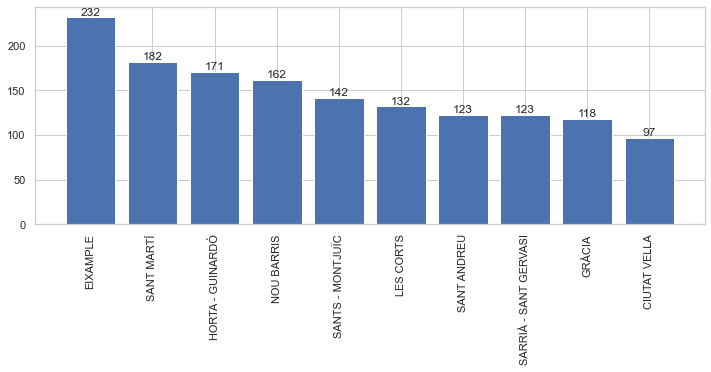

SEXE : SEX


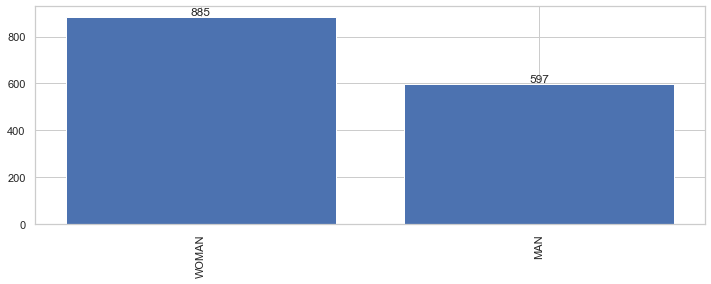

NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?


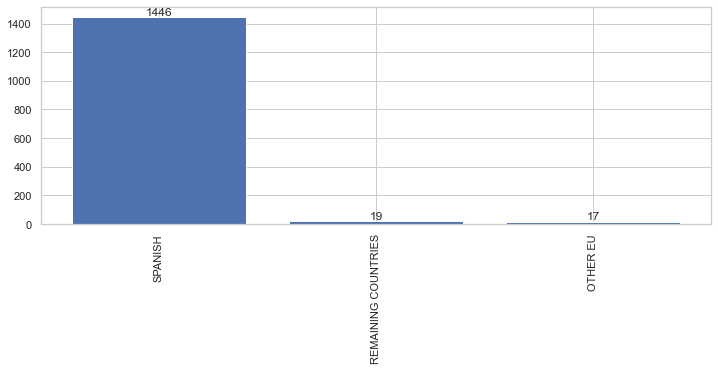

LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?


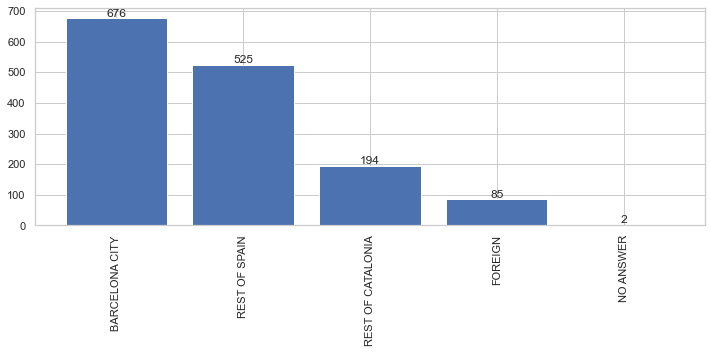

LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?


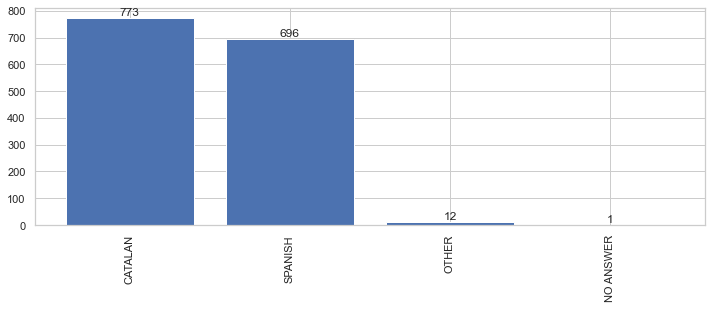

SENTPERTI : BELONGING - SPANISH VS CATALAN


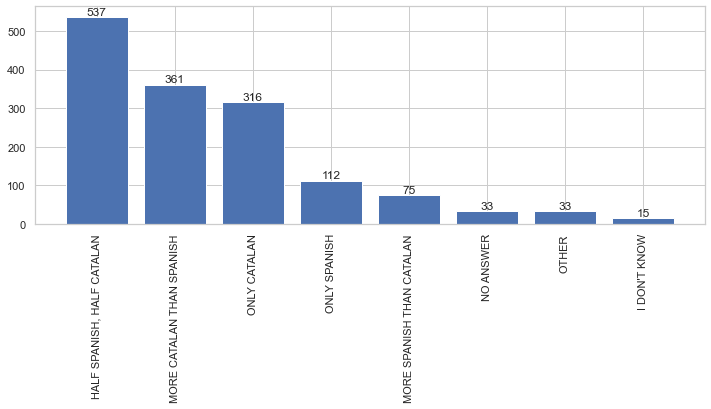

ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


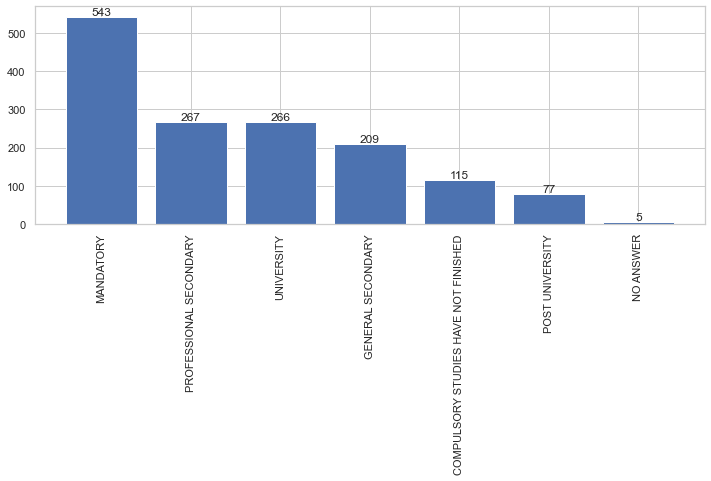

In [55]:
for i in var_list:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [56]:
for i in var_list:
    print(i, ":", questions_dict[i])
    display(size_pctg(i))

NOM_DISTRICTE : DISTRICT


NOM_DISTRICTE
CIUTAT VELLA              6.55
EIXAMPLE                 15.65
GRÀCIA                    7.96
HORTA - GUINARDÓ         11.54
LES CORTS                 8.91
NOU BARRIS               10.93
SANT ANDREU               8.30
SANT MARTÍ               12.28
SANTS - MONTJUÏC          9.58
SARRIÀ - SANT GERVASI     8.30
dtype: float64

SEXE : SEX


SEXE
MAN      40.28
WOMAN    59.72
dtype: float64

NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?


NACIO_ACT_UE
OTHER EU                1.15
REMAINING COUNTRIES     1.28
SPANISH                97.57
dtype: float64

LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?


LLOC_NAIX_1A4
BARCELONA CITY       45.61
FOREIGN               5.74
NO ANSWER             0.13
REST OF CATALONIA    13.09
REST OF SPAIN        35.43
dtype: float64

LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?


LLENGUA_HAB
CATALAN      52.16
NO ANSWER     0.07
OTHER         0.81
SPANISH      46.96
dtype: float64

SENTPERTI : BELONGING - SPANISH VS CATALAN


SENTPERTI
HALF SPANISH, HALF CATALAN    36.23
I DON'T KNOW                   1.01
MORE CATALAN THAN SPANISH     24.36
MORE SPANISH THAN CATALAN      5.06
NO ANSWER                      2.23
ONLY CATALAN                  21.32
ONLY SPANISH                   7.56
OTHER                          2.23
dtype: float64

ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


ESTUDIS_1A6
COMPULSORY STUDIES HAVE NOT FINISHED     7.76
GENERAL SECONDARY                       14.10
MANDATORY                               36.64
NO ANSWER                                0.34
POST UNIVERSITY                          5.20
PROFESSIONAL SECONDARY                  18.02
UNIVERSITY                              17.95
dtype: float64

In [57]:
for i in var_list:
    print(i, ":", questions_dict[i])
    display(ctab(i))

NOM_DISTRICTE : DISTRICT


Would_live_in_another_neighborhood,0.0,1.0
NOM_DISTRICTE,,
CIUTAT VELLA,63,8
EIXAMPLE,185,20
GRÀCIA,89,12
HORTA - GUINARDÓ,115,22
LES CORTS,112,4
NOU BARRIS,98,28
SANT ANDREU,85,23
SANT MARTÍ,134,18
SANTS - MONTJUÏC,86,24


SEXE : SEX


Would_live_in_another_neighborhood,0.0,1.0
SEXE,,
MAN,416,63
WOMAN,649,101


NACIO_ACT_UE : WHAT IS YOUR NATIONALITY?


Would_live_in_another_neighborhood,0.0,1.0
NACIO_ACT_UE,,
OTHER EU,15,2
REMAINING COUNTRIES,13,5
SPANISH,1037,157


LLOC_NAIX_1A4 : WHAT IS YOUR PLACE OF BIRTH?


Would_live_in_another_neighborhood,0.0,1.0
LLOC_NAIX_1A4,,
BARCELONA CITY,501,78
FOREIGN,66,11
NO ANSWER,2,0
REST OF CATALONIA,135,19
REST OF SPAIN,361,56


LLENGUA_HAB : WHAT IS YOUR USUAL LANGUAGE?


Would_live_in_another_neighborhood,0.0,1.0
LLENGUA_HAB,,
CATALAN,566,86
NO ANSWER,1,0
OTHER,9,2
SPANISH,489,76


SENTPERTI : BELONGING - SPANISH VS CATALAN


Would_live_in_another_neighborhood,0.0,1.0
SENTPERTI,,
"HALF SPANISH, HALF CATALAN",396,47
I DON'T KNOW,13,1
MORE CATALAN THAN SPANISH,257,49
MORE SPANISH THAN CATALAN,47,11
NO ANSWER,21,4
ONLY CATALAN,237,33
ONLY SPANISH,71,14
OTHER,23,5


ESTUDIS_1A6 : WHAT IS YOUR LEVEL OF FINISHED STUDIES?


Would_live_in_another_neighborhood,0.0,1.0
ESTUDIS_1A6,,
COMPULSORY STUDIES HAVE NOT FINISHED,76,11
GENERAL SECONDARY,141,29
MANDATORY,399,63
NO ANSWER,3,0
POST UNIVERSITY,60,6
PROFESSIONAL SECONDARY,201,25
UNIVERSITY,185,30


Questions to be used in the model: 
```
NOM_DISTRICTE, SEXE
``` 
Other questions will be used in statistical description of the sample.

In [58]:
# DISTRICT
x = 'NOM_DISTRICTE'
data[x].unique()

array(['SANTS - MONTJUÏC', 'SANT ANDREU', 'SARRIÀ - SANT GERVASI',
       'NOU BARRIS', 'CIUTAT VELLA', 'HORTA - GUINARDÓ', 'EIXAMPLE',
       'GRÀCIA', 'LES CORTS', 'SANT MARTÍ'], dtype=object)

In [59]:
data['District'] = data[x]

In [60]:
# GENDER
x='SEXE'
data[x].unique()

array(['MAN', 'WOMAN'], dtype=object)

In [61]:
data_prep = {'WOMAN': 1,
            'MAN': 0}
data['Gender'] = [data_prep[i] for i in data[x]]

#### City and neighborhood

In [62]:
var_list = ['TMP_RES_BCN_1A6', 'TMP_RES_BARRI_1A6', 'EVO1A_BCN', 'EVO1A_BARRI', 'FUTUR_BCN', 'FUTUR_BARRI',
           'SATISF_RES_BCN_0A10', 'SATISF_RES_BARRI_0A10', 'VAL_SEGUR', 'VAL_SEGUR_BARRI', 
            'VAL_GESTMUNI', 'VAL_GESTBARRI', 'COMPARA_BARRI', 'US_ASSOCIA_BARRI', 
            'VAL_TRANSP_1A5', 'VAL_TRANSP_BARRI_1A5', 'HAB_COTXE_PART']

TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?


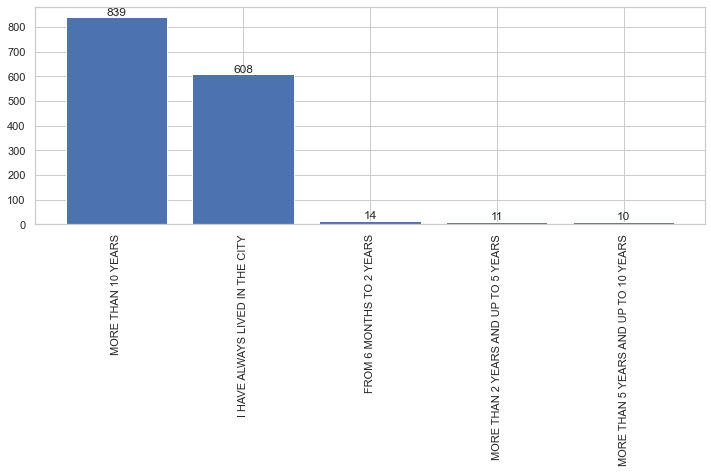

TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?


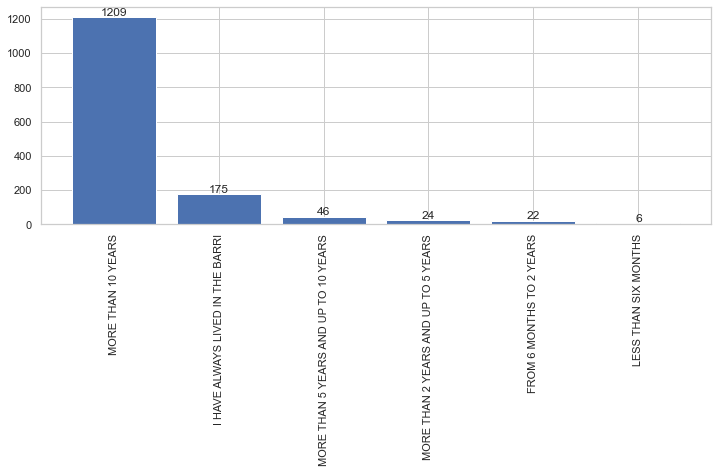

EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?


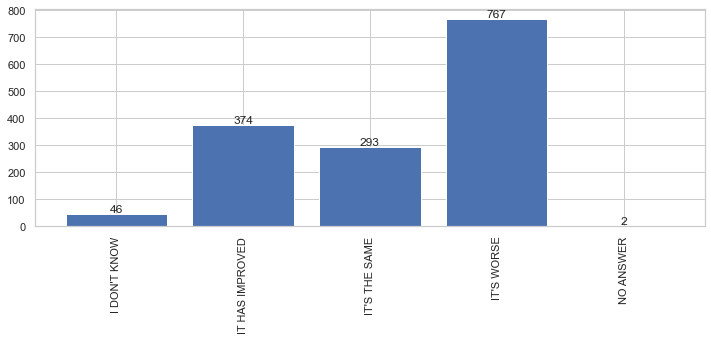

EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?


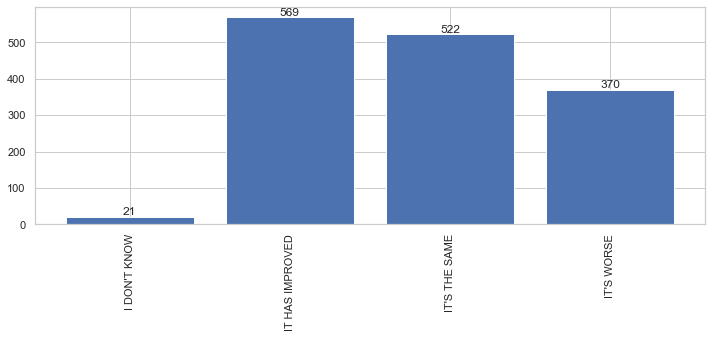

FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?


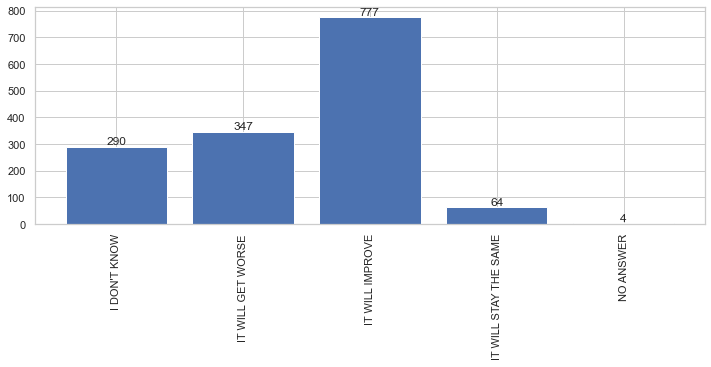

FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?


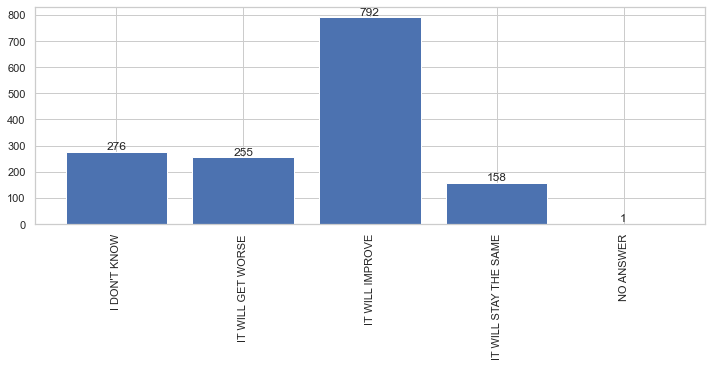

SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?


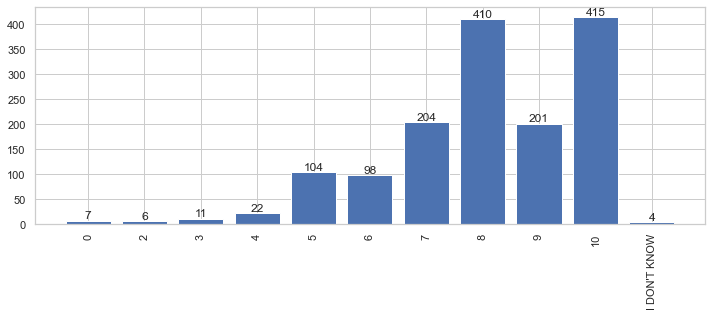

SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?


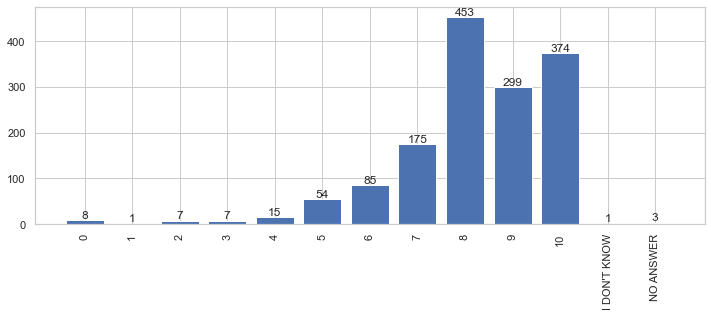

VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


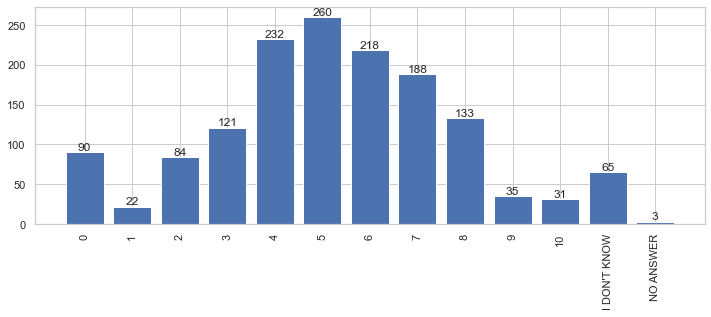

VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


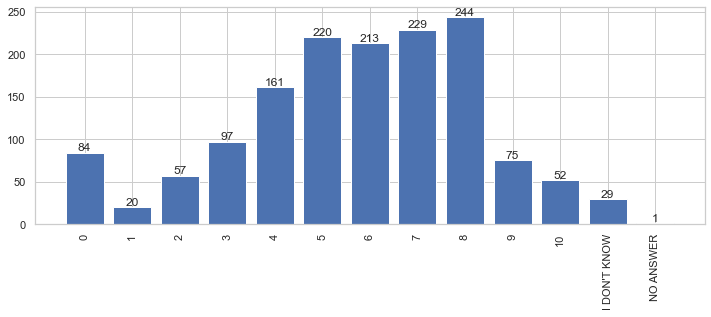

VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


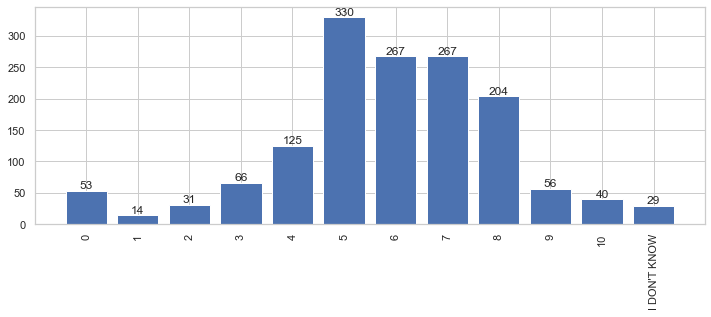

VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?


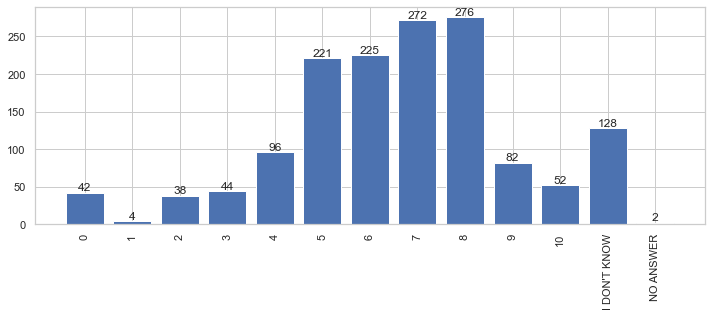

COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?


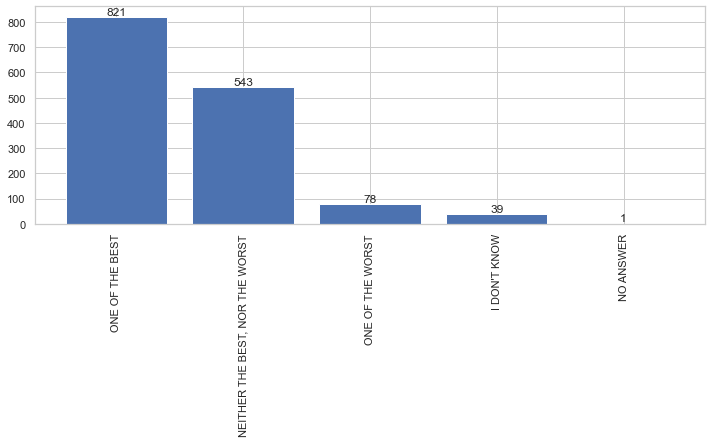

US_ASSOCIA_BARRI : DO YOU PARTICIPATE IN ANY ASSOCIATION OR ENTITY IN YOUR NEIGHBORHOOD?


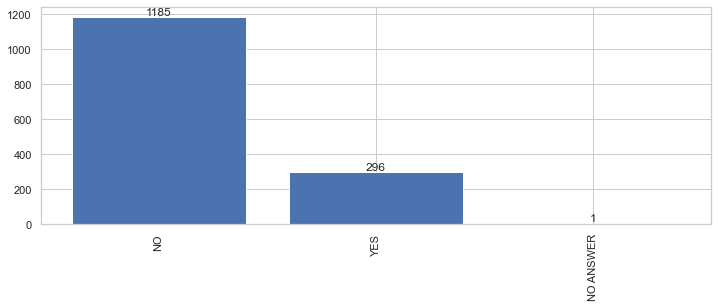

VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


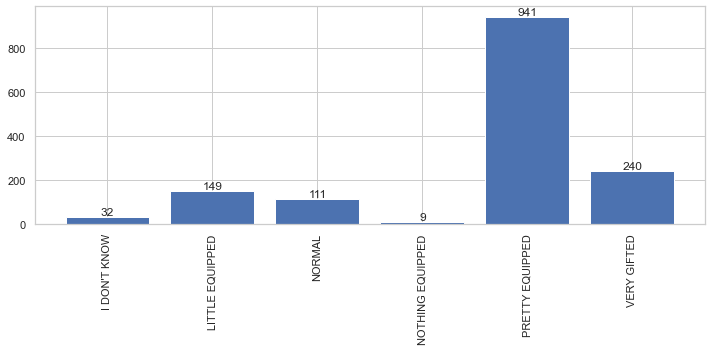

VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


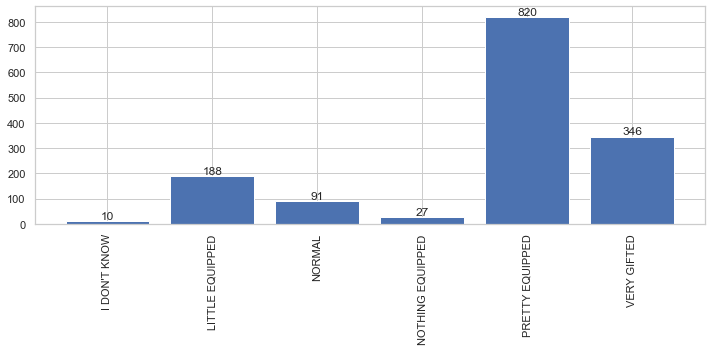

HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR


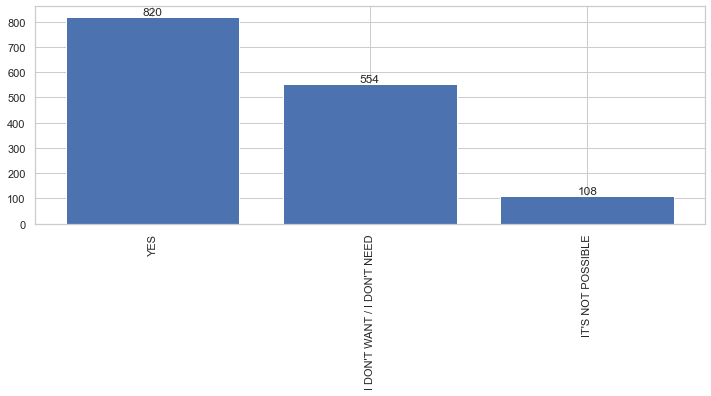

In [63]:
for i in var_list:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [64]:
for i in var_list:
    print('\n', i, ":", questions_dict[i])
    display(size_pctg(i))


 TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?


TMP_RES_BCN_1A6
FROM 6 MONTHS TO 2 YEARS                 0.94
I HAVE ALWAYS LIVED IN THE CITY         41.03
MORE THAN 10 YEARS                      56.61
MORE THAN 2 YEARS AND UP TO 5 YEARS      0.74
MORE THAN 5 YEARS AND UP TO 10 YEARS     0.67
dtype: float64


 TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?


TMP_RES_BARRI_1A6
FROM 6 MONTHS TO 2 YEARS                 1.48
I HAVE ALWAYS LIVED IN THE BARRI        11.81
LESS THAN SIX MONTHS                     0.40
MORE THAN 10 YEARS                      81.58
MORE THAN 2 YEARS AND UP TO 5 YEARS      1.62
MORE THAN 5 YEARS AND UP TO 10 YEARS     3.10
dtype: float64


 EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?


EVO1A_BCN
I DON'T KNOW        3.10
IT HAS IMPROVED    25.24
IT'S THE SAME      19.77
IT'S WORSE         51.75
NO ANSWER           0.13
dtype: float64


 EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?


EVO1A_BARRI
I DON'T KNOW        1.42
IT HAS IMPROVED    38.39
IT'S THE SAME      35.22
IT'S WORSE         24.97
dtype: float64


 FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?


FUTUR_BCN
I DON'T KNOW             19.57
IT WILL GET WORSE        23.41
IT WILL IMPROVE          52.43
IT WILL STAY THE SAME     4.32
NO ANSWER                 0.27
dtype: float64


 FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?


FUTUR_BARRI
I DON'T KNOW             18.62
IT WILL GET WORSE        17.21
IT WILL IMPROVE          53.44
IT WILL STAY THE SAME    10.66
NO ANSWER                 0.07
dtype: float64


 SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?


SATISF_RES_BCN_0A10
0                0.47
2                0.40
3                0.74
4                1.48
5                7.02
6                6.61
7               13.77
8               27.67
9               13.56
10              28.00
I DON'T KNOW     0.27
dtype: float64


 SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?


SATISF_RES_BARRI_0A10
0                0.54
1                0.07
2                0.47
3                0.47
4                1.01
5                3.64
6                5.74
7               11.81
8               30.57
9               20.18
10              25.24
I DON'T KNOW     0.07
NO ANSWER        0.20
dtype: float64


 VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


VAL_SEGUR
0                6.07
1                1.48
2                5.67
3                8.16
4               15.65
5               17.54
6               14.71
7               12.69
8                8.97
9                2.36
10               2.09
I DON'T KNOW     4.39
NO ANSWER        0.20
dtype: float64


 VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


VAL_SEGUR_BARRI
0                5.67
1                1.35
2                3.85
3                6.55
4               10.86
5               14.84
6               14.37
7               15.45
8               16.46
9                5.06
10               3.51
I DON'T KNOW     1.96
NO ANSWER        0.07
dtype: float64


 VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


VAL_GESTMUNI
0                3.58
1                0.94
2                2.09
3                4.45
4                8.43
5               22.27
6               18.02
7               18.02
8               13.77
9                3.78
10               2.70
I DON'T KNOW     1.96
dtype: float64


 VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?


VAL_GESTBARRI
0                2.83
1                0.27
2                2.56
3                2.97
4                6.48
5               14.91
6               15.18
7               18.35
8               18.62
9                5.53
10               3.51
I DON'T KNOW     8.64
NO ANSWER        0.13
dtype: float64


 COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?


COMPARA_BARRI
I DON'T KNOW                        2.63
NEITHER THE BEST, NOR THE WORST    36.64
NO ANSWER                           0.07
ONE OF THE BEST                    55.40
ONE OF THE WORST                    5.26
dtype: float64


 US_ASSOCIA_BARRI : DO YOU PARTICIPATE IN ANY ASSOCIATION OR ENTITY IN YOUR NEIGHBORHOOD?


US_ASSOCIA_BARRI
NO           79.96
NO ANSWER     0.07
YES          19.97
dtype: float64


 VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


VAL_TRANSP_1A5
I DON'T KNOW         2.16
LITTLE EQUIPPED     10.05
NORMAL               7.49
NOTHING EQUIPPED     0.61
PRETTY EQUIPPED     63.50
VERY GIFTED         16.19
dtype: float64


 VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


VAL_TRANSP_BARRI_1A5
I DON'T KNOW         0.67
LITTLE EQUIPPED     12.69
NORMAL               6.14
NOTHING EQUIPPED     1.82
PRETTY EQUIPPED     55.33
VERY GIFTED         23.35
dtype: float64


 HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR


HAB_COTXE_PART
I DON'T WANT / I DON'T NEED    37.38
IT'S NOT POSSIBLE               7.29
YES                            55.33
dtype: float64

In [65]:
for i in var_list:
    print('\n', i, ":", questions_dict[i])
    display(ctab(i))


 TMP_RES_BCN_1A6 : HOW LONG HAVE YOU BEEN LIVING IN BARCELONA?


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BCN_1A6,,
FROM 6 MONTHS TO 2 YEARS,6,6
I HAVE ALWAYS LIVED IN THE CITY,455,70
MORE THAN 10 YEARS,589,87
MORE THAN 2 YEARS AND UP TO 5 YEARS,7,1
MORE THAN 5 YEARS AND UP TO 10 YEARS,8,0



 TMP_RES_BARRI_1A6 : HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
TMP_RES_BARRI_1A6,,
FROM 6 MONTHS TO 2 YEARS,10,6
I HAVE ALWAYS LIVED IN THE BARRI,144,7
LESS THAN SIX MONTHS,4,1
MORE THAN 10 YEARS,862,139
MORE THAN 2 YEARS AND UP TO 5 YEARS,13,5
MORE THAN 5 YEARS AND UP TO 10 YEARS,32,6



 EVO1A_BCN : DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BCN,,
I DON'T KNOW,34,4
IT HAS IMPROVED,286,38
IT'S THE SAME,204,31
IT'S WORSE,540,90
NO ANSWER,1,1



 EVO1A_BARRI : IN GENERAL, DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?


Would_live_in_another_neighborhood,0.0,1.0
EVO1A_BARRI,,
I DON'T KNOW,13,2
IT HAS IMPROVED,426,62
IT'S THE SAME,385,51
IT'S WORSE,241,49



 FUTUR_BCN : FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BCN,,
I DON'T KNOW,210,23
IT WILL GET WORSE,244,35
IT WILL IMPROVE,569,96
IT WILL STAY THE SAME,40,9
NO ANSWER,2,1



 FUTUR_BARRI : AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?


Would_live_in_another_neighborhood,0.0,1.0
FUTUR_BARRI,,
I DON'T KNOW,191,29
IT WILL GET WORSE,165,34
IT WILL IMPROVE,596,82
IT WILL STAY THE SAME,112,19
NO ANSWER,1,0



 SATISF_RES_BCN_0A10 : ON A SCALE OF 0 TO 10, BEING 0 NOT SATISFIED AND 10 VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR SATISFACTION DEGREE OF LIVING IN THE CITY OF BARCELONA?


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BCN_0A10,,
0,3,1
2,2,0
3,3,0
4,10,4
5,57,8
6,58,11
7,130,27
8,312,49
9,161,18



 SATISF_RES_BARRI_0A10 : ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
SATISF_RES_BARRI_0A10,,
0,0,2
2,0,6
3,1,2
4,3,5
5,24,11
6,51,11
7,102,29
8,329,56
9,242,19



 VAL_SEGUR : CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR,,
0,52,14
1,15,0
2,52,13
3,84,16
4,154,26
5,194,27
6,161,24
7,145,18
8,103,14



 VAL_SEGUR_BARRI : CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD


Would_live_in_another_neighborhood,0.0,1.0
VAL_SEGUR_BARRI,,
0,44,14
1,11,3
2,35,10
3,67,16
4,103,22
5,158,24
6,154,20
7,166,26
8,193,20



 VAL_GESTMUNI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 BEING VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTMUNI,,
0,25,8
1,8,2
2,19,7
3,49,6
4,87,11
5,224,41
6,184,40
7,209,21
8,167,14



 VAL_GESTBARRI : ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
VAL_GESTBARRI,,
0,21,8
1,2,1
2,21,5
3,23,5
4,67,10
5,149,28
6,157,38
7,208,25
8,225,18



 COMPARA_BARRI : DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?


Would_live_in_another_neighborhood,0.0,1.0
COMPARA_BARRI,,
I DON'T KNOW,28,5
"NEITHER THE BEST, NOR THE WORST",330,95
NO ANSWER,1,0
ONE OF THE BEST,676,43
ONE OF THE WORST,30,21



 US_ASSOCIA_BARRI : DO YOU PARTICIPATE IN ANY ASSOCIATION OR ENTITY IN YOUR NEIGHBORHOOD?


Would_live_in_another_neighborhood,0.0,1.0
US_ASSOCIA_BARRI,,
NO,840,135
NO ANSWER,0,1
YES,225,28



 VAL_TRANSP_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT BARCELONA IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_1A5,,
I DON'T KNOW,25,3
LITTLE EQUIPPED,97,18
NORMAL,83,8
NOTHING EQUIPPED,4,3
PRETTY EQUIPPED,676,98
VERY GIFTED,180,34



 VAL_TRANSP_BARRI_1A5 : IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED CITY?


Would_live_in_another_neighborhood,0.0,1.0
VAL_TRANSP_BARRI_1A5,,
I DON'T KNOW,6,2
LITTLE EQUIPPED,139,17
NORMAL,55,13
NOTHING EQUIPPED,18,7
PRETTY EQUIPPED,585,86
VERY GIFTED,262,39



 HAB_COTXE_PART : DO YOU HAVE: PRIVATE CAR


Would_live_in_another_neighborhood,0.0,1.0
HAB_COTXE_PART,,
I DON'T WANT / I DON'T NEED,423,54
IT'S NOT POSSIBLE,76,15
YES,566,95


Questions to be used in the model:
```
TMP_RES_BARRI_1A6, 
EVO1A_BCN, EVO1A_BARRI, 
FUTUR_BCN, FUTUR_BARRI, 
SATISF_RES_BCN_0A10, SATISF_RES_BARRI_0A10, 
VAL_SEGUR, VAL_SEGUR_BARRI,
VAL_GESTMUNI, VAL_GESTBARRI, 
COMPARA_BARRI, 
US_ASSOCIA_BARRI,
VAL_TRANSP_1A5, VAL_TRANSP_BARRI_1A5, HAB_COTXE_PART
```
Other questions will be used in statistical description of the sample.

In [66]:
# HOW LONG HAVE YOU BEEN LIVING IN THIS NEIGHBORHOOD?
x = 'TMP_RES_BARRI_1A6'
data[x].unique()

array(['MORE THAN 10 YEARS', 'I HAVE ALWAYS LIVED IN THE BARRI',
       'MORE THAN 5 YEARS AND UP TO 10 YEARS',
       'MORE THAN 2 YEARS AND UP TO 5 YEARS', 'LESS THAN SIX MONTHS',
       'FROM 6 MONTHS TO 2 YEARS'], dtype=object)

In [67]:
data_prep = {'I HAVE ALWAYS LIVED IN THE BARRI': 'I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD',
             'MORE THAN 10 YEARS': 'MORE THAN 10 YEARS', 
             'MORE THAN 5 YEARS AND UP TO 10 YEARS': 'LESS THAN 10 YEARS',
             'MORE THAN 2 YEARS AND UP TO 5 YEARS': 'LESS THAN 10 YEARS', 
             'FROM 6 MONTHS TO 2 YEARS': 'LESS THAN 10 YEARS',
             'LESS THAN SIX MONTHS': 'LESS THAN 10 YEARS',
             'NO ANSWER': np.nan}
data['Time_living_in_barri'] = [data_prep[i] for i in data[x]]

In [68]:
# DO YOU THINK YOUR NEIGHBORHOOD HAS IMPROVED OR WORSENED IN THE LAST YEAR?
x = 'EVO1A_BARRI'
data[x].unique()

array(["IT'S WORSE", "I DON'T KNOW", "IT'S THE SAME", 'IT HAS IMPROVED'],
      dtype=object)

In [69]:
data_prep = {"IT'S WORSE": "IT IS WORSE", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": "IT IS THE SAME",
             'NO ANSWER': np.nan}
data['Barri_evolution'] = [data_prep[i] for i in data[x]]

In [70]:
# DO YOU THINK THAT LAST YEAR BARCELONA HAS IMPROVED OR WORSENED?
x = 'EVO1A_BCN'
data[x].unique()

array(["IT'S THE SAME", "I DON'T KNOW", 'IT HAS IMPROVED', "IT'S WORSE",
       'NO ANSWER'], dtype=object)

In [71]:
data_prep = {"IT'S WORSE": "IT IS WORSE", 
             "IT'S THE SAME": "IT IS THE SAME", 
             'IT HAS IMPROVED': "IT HAS IMPROVED", 
             "I DON'T KNOW": "IT IS THE SAME",
             'NO ANSWER': np.nan}
data['BCN_evolution'] = [data_prep[i] for i in data[x]]

In [72]:
# AND FACING THE FUTURE, DO YOU THINK YOUR NEIGHBORHOOD WILL IMPROVE OR GET WORSE?
x = 'FUTUR_BARRI'
data[x].unique()

array(['IT WILL GET WORSE', "I DON'T KNOW", 'IT WILL STAY THE SAME',
       'IT WILL IMPROVE', 'NO ANSWER'], dtype=object)

In [73]:
data_prep = {'IT WILL GET WORSE': "IT WILL GET WORSE", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": "IT WILL STAY THE SAME", 
             'NO ANSWER': np.nan}
data['Barri_future'] = [data_prep[i] for i in data[x]]

In [74]:
# AND FACING THE FUTURE, DO YOU THINK BARCELONA WILL IMPROVE OR GET WORSE?
x = 'FUTUR_BCN'
data[x].unique()

array(['IT WILL STAY THE SAME', "I DON'T KNOW", 'IT WILL GET WORSE',
       'IT WILL IMPROVE', 'NO ANSWER'], dtype=object)

In [75]:
data_prep = {'IT WILL GET WORSE': "IT WILL GET WORSE", 
             'IT WILL IMPROVE': "IT WILL IMPROVE", 
             'IT WILL STAY THE SAME': "IT WILL STAY THE SAME",
             "I DON'T KNOW": "IT WILL STAY THE SAME", 
             'NO ANSWER': np.nan}
data['BCN_future'] = [data_prep[i] for i in data[x]]

In [76]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN YOUR NEIGHBORHOOD? - GROUPED
x = 'SATISF_RES_BARRI_0A10'
data[x].unique()

array([8, 10, 4, 7, 9, 5, 6, 2, 0, 3, 1, 'NO ANSWER', "I DON'T KNOW"],
      dtype=object)

In [77]:
data_prep = {0: 'NOT SATISFIED',
             1: 'NOT SATISFIED',
             2: 'NOT SATISFIED',
             3: 'NOT SATISFIED',
             4: 'FAIRLY SATISFIED',
             5: 'FAIRLY SATISFIED',
             6: 'FAIRLY SATISFIED', 
             7: 'SATISFIED',
             8: 'SATISFIED',
             9: 'SATISFIED', 
             10: 'SATISFIED',  
             "I DON'T KNOW": "FAIRLY SATISFIED", 
             'NO ANSWER': np.nan}
data['Barri_satisfaction_of_living'] = [data_prep[i] for i in data[x]]

In [78]:
# ON A SCALE OF 0 TO 10, 0 BEING NOT SATISFIED AND 10 BEING VERY SATISFIED, COULD YOU TELL ME WHAT IS YOUR DEGREE OF SATISFACTION OF LIVING IN BARCELONA?
x = 'SATISF_RES_BCN_0A10'
data[x].unique()

array([8, 7, 10, 9, 5, 6, 4, 0, "I DON'T KNOW", 3, 2], dtype=object)

In [79]:
data_prep = {0: 'NOT SATISFIED',
             1: 'NOT SATISFIED',
             2: 'NOT SATISFIED',
             3: 'NOT SATISFIED',
             4: 'FAIRLY SATISFIED',
             5: 'FAIRLY SATISFIED',
             6: 'FAIRLY SATISFIED', 
             7: 'SATISFIED',
             8: 'SATISFIED',
             9: 'SATISFIED', 
             10: 'SATISFIED',  
             "I DON'T KNOW": "FAIRLY SATISFIED", 
             'NO ANSWER': np.nan}
data['BCN_satisfaction_of_living'] = [data_prep[i] for i in data[x]]

In [80]:
# CITY SERVICES - RATE: CITIZEN SECURITY IN THE NEIGHBORHOOD
x = 'VAL_SEGUR_BARRI'
data[x].unique()

array([4, 5, 8, 7, 1, 6, "I DON'T KNOW", 2, 0, 3, 9, 10, 'NO ANSWER'],
      dtype=object)

In [81]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD", 
             'NO ANSWER': np.nan}
data['Barri_citizen_security'] = [data_prep[i] for i in data[x]]

In [82]:
# CITY SERVICES - RATE: CITIZEN SECURITY IN THE CITY AS A WHOLE
x = 'VAL_SEGUR'
data[x].unique()

array([4, 5, 10, 7, 6, 2, 3, 'NO ANSWER', 8, 0, "I DON'T KNOW", 1, 9],
      dtype=object)

In [83]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD", 
             'NO ANSWER': np.nan}
data['BCN_citizen_security'] = [data_prep[i] for i in data[x]]

In [84]:
# ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL IN YOUR NEIGHBORHOOD?
x = 'VAL_GESTBARRI'
data[x].unique()

array([6, "I DON'T KNOW", 7, 5, 9, 8, 3, 4, 2, 10, 1, 0, 'NO ANSWER'],
      dtype=object)

In [85]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD", 
             'NO ANSWER': np.nan}
data['Barri_management'] = [data_prep[i] for i in data[x]]

In [86]:
# ON A SCALE FROM 0 TO 10, 0 BEING VERY BAD AND 10 VERY GOOD, HOW DO YOU RATE THE MANAGEMENT OF THE CITY COUNCIL?
x = 'VAL_GESTMUNI'
data[x].unique()

array([7, 6, 5, 2, 4, 0, 9, "I DON'T KNOW", 10, 3, 8, 1], dtype=object)

In [87]:
data_prep = {0: 'BAD',
             1: 'BAD',
             2: 'BAD',
             3: 'BAD',
             4: 'NEITHER BAD, NOR GOOD',
             5: 'NEITHER BAD, NOR GOOD',
             6: 'NEITHER BAD, NOR GOOD', 
             7: 'GOOD',
             8: 'GOOD',
             9: 'GOOD', 
             10: 'GOOD',  
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD", 
             'NO ANSWER': np.nan}
data['BCN_management'] = [data_prep[i] for i in data[x]]

In [88]:
# DO YOU THINK YOUR NEIGHBORHOOD IS ONE OF THE BEST OR ONE OF THE WORST?
x = 'COMPARA_BARRI'
data[x].unique()

array(['ONE OF THE BEST', "I DON'T KNOW",
       'NEITHER THE BEST, NOR THE WORST', 'ONE OF THE WORST', 'NO ANSWER'],
      dtype=object)

In [89]:
data_prep = {'NEITHER THE BEST, NOR THE WORST': 'NEITHER THE BEST, NOR THE WORST', 
             'ONE OF THE BEST': 'ONE OF THE BEST',
             'ONE OF THE WORST': 'ONE OF THE WORST', 
             "I DON'T KNOW": "NEITHER THE BEST, NOR THE WORST", 
             'NO ANSWER': np.nan}
data['Barri_comparison'] = [data_prep[i] for i in data[x]]

In [90]:
# DO YOU PARTICIPATE IN ANY ASSOCIATION OR ENTITY IN YOUR NEIGHBORHOOD?
x = 'US_ASSOCIA_BARRI'
data[x].unique()

array(['YES', 'NO', 'NO ANSWER'], dtype=object)

In [91]:
data_prep = {'YES': 1,
            'NO': 0,
            'NO ANSWER': np.nan}
data['Barri_association'] = [data_prep[i] for i in data[x]]

In [92]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED?
x = 'VAL_TRANSP_BARRI_1A5'
data[x].unique()

array(['PRETTY EQUIPPED', 'VERY GIFTED', 'NOTHING EQUIPPED',
       "I DON'T KNOW", 'LITTLE EQUIPPED', 'NORMAL'], dtype=object)

In [93]:
data_prep = {'VERY GIFTED': 'GOOD', 
             'PRETTY EQUIPPED': 'GOOD', 
             'NORMAL': 'NEITHER BAD, NOR GOOD', 
             'LITTLE EQUIPPED': 'BAD', 
             'NOTHING EQUIPPED': 'BAD', 
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD",
             'NO ANSWER': np.nan}
data['Barri_transport'] = [data_prep[i] for i in data['VAL_TRANSP_BARRI_1A5']]

In [94]:
# IN RELATION TO PUBLIC TRANSPORT, WOULD YOU SAY THAT YOUR NEIGHBORHOOD IS A VERY, ENOUGH, LITTLE OR NOTHING EQUIPPED?
x = 'VAL_TRANSP_1A5'
data[x].unique()

array(['PRETTY EQUIPPED', "I DON'T KNOW", 'NORMAL', 'LITTLE EQUIPPED',
       'VERY GIFTED', 'NOTHING EQUIPPED'], dtype=object)

In [95]:
data_prep = {'VERY GIFTED': 'GOOD', 
             'PRETTY EQUIPPED': 'GOOD', 
             'NORMAL': 'NEITHER BAD, NOR GOOD', 
             'LITTLE EQUIPPED': 'BAD', 
             'NOTHING EQUIPPED': 'BAD', 
             "I DON'T KNOW": "NEITHER BAD, NOR GOOD",
             'NO ANSWER': np.nan}
data['BCN_transport'] = [data_prep[i] for i in data['VAL_TRANSP_1A5']]

In [96]:
# DO YOU HAVE: PRIVATE CAR
x = 'HAB_COTXE_PART'
data[x].unique()

array(['YES', "I DON'T WANT / I DON'T NEED", "IT'S NOT POSSIBLE"],
      dtype=object)

In [97]:
data_prep = {'YES': 1, 
             "I DON'T WANT / I DON'T NEED": 0, 
             "IT'S NOT POSSIBLE": 0}
data['Owns_a_car'] = [data_prep[i] for i in data[x]]

#### About living conditions (all for model):

In [98]:
var_list = ['HAB_REGIM_1A5', 'HAB_M2_1A14', 'LLAR_INGRESSOS_1A10', 
            'HAB_TREBDOM', 'PROB_LLAR_ECON_1A6', 'RESUM_PARENTIU']

HAB_REGIM_1A5 : DO YOU OWN OR DO YOU RENT YOUR HOUSE/FLAT/ROOM?


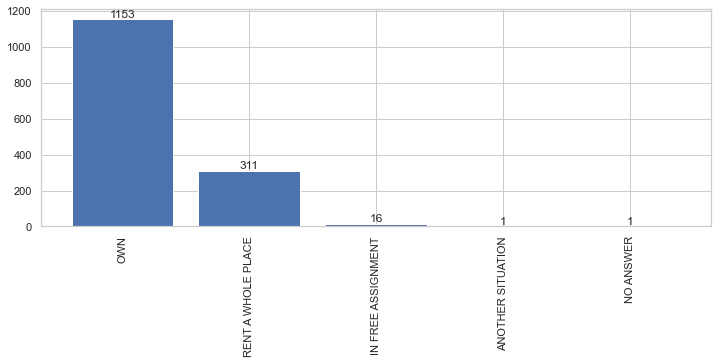

HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED


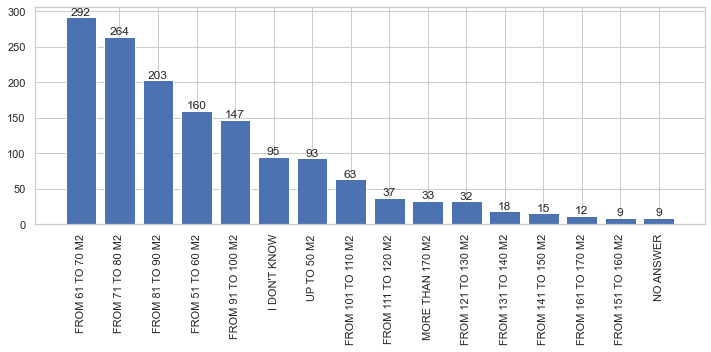

LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED


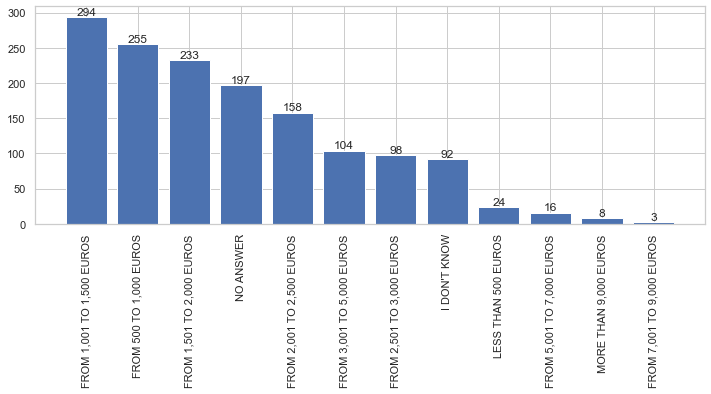

HAB_TREBDOM : DO YOU HAVE: REMUNERATED PERSON TO HELP WITH HOMEWORK OR FAMILY CARE


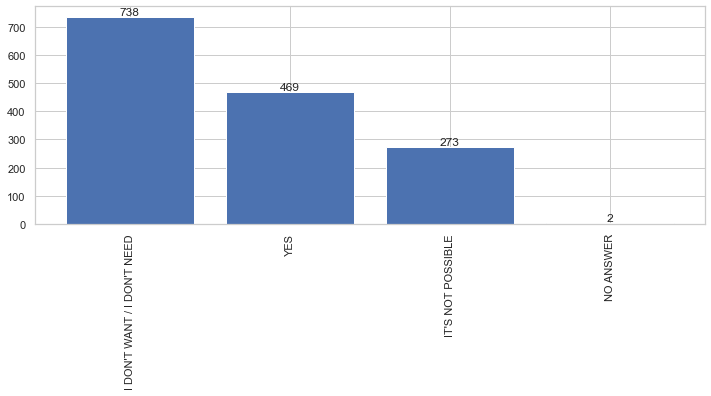

PROB_LLAR_ECON_1A6 : IN RELATION TO THE TOTAL INCOME OF YOUR HOME, HOW DO YOU USUALLY ARRIVE AT THE END OF THE MONTH?


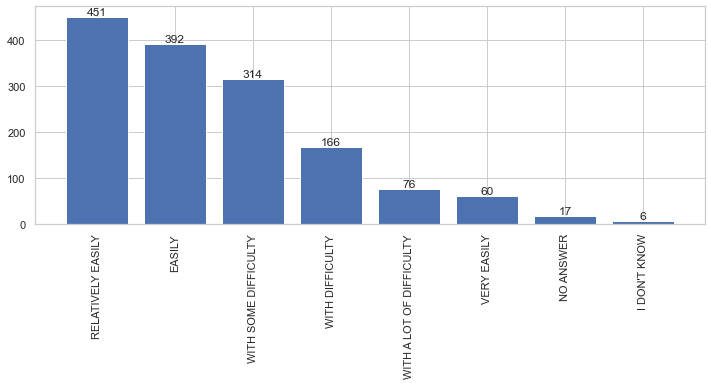

RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?


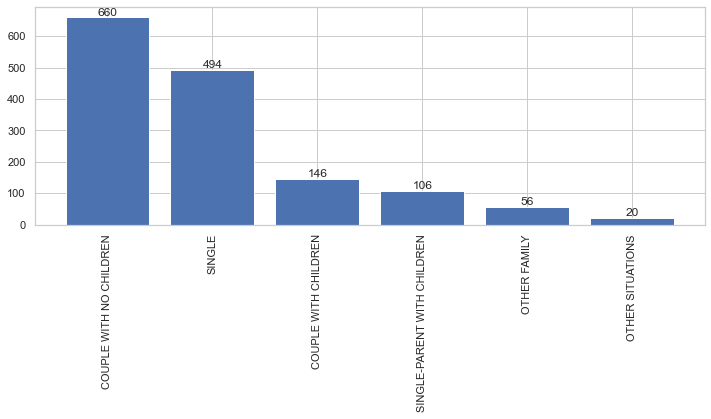

In [99]:
for i in var_list:
    print(i, ":", questions_dict[i])
    simple_plot(i)

In [100]:
for i in var_list:
    print('\n', i, ":", questions_dict[i])
    display(size_pctg(i))


 HAB_REGIM_1A5 : DO YOU OWN OR DO YOU RENT YOUR HOUSE/FLAT/ROOM?


HAB_REGIM_1A5
ANOTHER SITUATION      0.07
IN FREE ASSIGNMENT     1.08
NO ANSWER              0.07
OWN                   77.80
RENT A WHOLE PLACE    20.99
dtype: float64


 HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED


HAB_M2_1A14
FROM 101 TO 110 M2     4.25
FROM 111 TO 120 M2     2.50
FROM 121 TO 130 M2     2.16
FROM 131 TO 140 M2     1.21
FROM 141 TO 150 M2     1.01
FROM 151 TO 160 M2     0.61
FROM 161 TO 170 M2     0.81
FROM 51 TO 60 M2      10.80
FROM 61 TO 70 M2      19.70
FROM 71 TO 80 M2      17.81
FROM 81 TO 90 M2      13.70
FROM 91 TO 100 M2      9.92
I DON'T KNOW           6.41
MORE THAN 170 M2       2.23
NO ANSWER              0.61
UP TO 50 M2            6.28
dtype: float64


 LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED


LLAR_INGRESSOS_1A10
FROM 1,001 TO 1,500 EUROS    19.84
FROM 1,501 TO 2,000 EUROS    15.72
FROM 2,001 TO 2,500 EUROS    10.66
FROM 2,501 TO 3,000 EUROS     6.61
FROM 3,001 TO 5,000 EUROS     7.02
FROM 5,001 TO 7,000 EUROS     1.08
FROM 500 TO 1,000 EUROS      17.21
FROM 7,001 TO 9,000 EUROS     0.20
I DON'T KNOW                  6.21
LESS THAN 500 EUROS           1.62
MORE THAN 9,000 EUROS         0.54
NO ANSWER                    13.29
dtype: float64


 HAB_TREBDOM : DO YOU HAVE: REMUNERATED PERSON TO HELP WITH HOMEWORK OR FAMILY CARE


HAB_TREBDOM
I DON'T WANT / I DON'T NEED    49.80
IT'S NOT POSSIBLE              18.42
NO ANSWER                       0.13
YES                            31.65
dtype: float64


 PROB_LLAR_ECON_1A6 : IN RELATION TO THE TOTAL INCOME OF YOUR HOME, HOW DO YOU USUALLY ARRIVE AT THE END OF THE MONTH?


PROB_LLAR_ECON_1A6
EASILY                      26.45
I DON'T KNOW                 0.40
NO ANSWER                    1.15
RELATIVELY EASILY           30.43
VERY EASILY                  4.05
WITH A LOT OF DIFFICULTY     5.13
WITH DIFFICULTY             11.20
WITH SOME DIFFICULTY        21.19
dtype: float64


 RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?


RESUM_PARENTIU
COUPLE WITH CHILDREN            9.85
COUPLE WITH NO CHILDREN        44.53
OTHER FAMILY                    3.78
OTHER SITUATIONS                1.35
SINGLE                         33.33
SINGLE-PARENT WITH CHILDREN     7.15
dtype: float64

In [101]:
for i in var_list:
    print('\n', i, ":", questions_dict[i])
    display(ctab(i))


 HAB_REGIM_1A5 : DO YOU OWN OR DO YOU RENT YOUR HOUSE/FLAT/ROOM?


Would_live_in_another_neighborhood,0.0,1.0
HAB_REGIM_1A5,,
ANOTHER SITUATION,1,0
IN FREE ASSIGNMENT,11,2
NO ANSWER,1,0
OWN,836,132
RENT A WHOLE PLACE,216,30



 HAB_M2_1A14 : HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
HAB_M2_1A14,,
FROM 101 TO 110 M2,48,7
FROM 111 TO 120 M2,28,1
FROM 121 TO 130 M2,25,4
FROM 131 TO 140 M2,15,1
FROM 141 TO 150 M2,12,2
FROM 151 TO 160 M2,8,0
FROM 161 TO 170 M2,10,1
FROM 51 TO 60 M2,116,22
FROM 61 TO 70 M2,214,26



 LLAR_INGRESSOS_1A10 : WHAT IS THE NET MONTHLY INCOME OF ALL MEMBERS OF YOUR HOME? - GROUPED


Would_live_in_another_neighborhood,0.0,1.0
LLAR_INGRESSOS_1A10,,
"FROM 1,001 TO 1,500 EUROS",221,30
"FROM 1,501 TO 2,000 EUROS",155,29
"FROM 2,001 TO 2,500 EUROS",116,17
"FROM 2,501 TO 3,000 EUROS",67,9
"FROM 3,001 TO 5,000 EUROS",73,8
"FROM 5,001 TO 7,000 EUROS",15,1
"FROM 500 TO 1,000 EUROS",187,31
"FROM 7,001 TO 9,000 EUROS",3,0
I DON'T KNOW,77,7



 HAB_TREBDOM : DO YOU HAVE: REMUNERATED PERSON TO HELP WITH HOMEWORK OR FAMILY CARE


Would_live_in_another_neighborhood,0.0,1.0
HAB_TREBDOM,,
I DON'T WANT / I DON'T NEED,506,81
IT'S NOT POSSIBLE,186,36
NO ANSWER,0,1
YES,373,46



 PROB_LLAR_ECON_1A6 : IN RELATION TO THE TOTAL INCOME OF YOUR HOME, HOW DO YOU USUALLY ARRIVE AT THE END OF THE MONTH?


Would_live_in_another_neighborhood,0.0,1.0
PROB_LLAR_ECON_1A6,,
EASILY,273,48
I DON'T KNOW,5,0
NO ANSWER,11,3
RELATIVELY EASILY,325,41
VERY EASILY,48,6
WITH A LOT OF DIFFICULTY,58,10
WITH DIFFICULTY,116,25
WITH SOME DIFFICULTY,229,31



 RESUM_PARENTIU : WHAT IS THE TYPE OF YOUR FAMILY?


Would_live_in_another_neighborhood,0.0,1.0
RESUM_PARENTIU,,
COUPLE WITH CHILDREN,99,15
COUPLE WITH NO CHILDREN,465,70
OTHER FAMILY,34,9
OTHER SITUATIONS,15,3
SINGLE,378,55
SINGLE-PARENT WITH CHILDREN,74,12


All variables will be used in the model.

In [102]:
# DO YOU OWN OR DO YOU RENT YOUR HOUSE/FLAT/ROOM?
x = 'HAB_REGIM_1A5'
data[x].unique()

array(['OWN', 'NO ANSWER', 'RENT A WHOLE PLACE', 'IN FREE ASSIGNMENT',
       'ANOTHER SITUATION'], dtype=object)

In [103]:
data_prep = {'OWN': 1, 
             'NO ANSWER': np.nan, 
             'RENT A WHOLE PLACE': 0, 
             'IN FREE ASSIGNMENT': np.nan,
             'ANOTHER SITUATION': np.nan} 
data['House_owner'] = [data_prep[i] for i in data[x]]

In [104]:
# HOW MANY SQUARE METERS DOES YOUR FLAT OR HOUSE HAVE?
x = 'HAB_M2_1A14'
data[x].unique()

array(['FROM 91 TO 100 M2', 'FROM 101 TO 110 M2', 'FROM 61 TO 70 M2',
       'UP TO 50 M2', 'FROM 81 TO 90 M2', 'FROM 51 TO 60 M2',
       "I DON'T KNOW", 'FROM 71 TO 80 M2', 'FROM 121 TO 130 M2',
       'FROM 141 TO 150 M2', 'FROM 111 TO 120 M2', 'FROM 161 TO 170 M2',
       'FROM 131 TO 140 M2', 'MORE THAN 170 M2', 'NO ANSWER',
       'FROM 151 TO 160 M2'], dtype=object)

In [105]:
data_prep = {'UP TO 50 M2': '< 50 M2', 
             'FROM 51 TO 60 M2': '51-100 M2', 
             'FROM 61 TO 70 M2': '51-100 M2', 
             'FROM 71 TO 80 M2': '51-100 M2', 
             'FROM 81 TO 90 M2': '51-100 M2', 
             'FROM 91 TO 100 M2': '51-100 M2', 
             'FROM 101 TO 120 M2': '101-150 M2', 
             'FROM 101 TO 110 M2': '101-150 M2',
             'FROM 111 TO 120 M2': '101-150 M2', 
             'FROM 121 TO 150 M2': '101-150 M2', 
             'FROM 121 TO 130 M2': '101-150 M2',
             'FROM 131 TO 140 M2': '101-150 M2', 
             'FROM 141 TO 150 M2': '101-150 M2', 
             'FROM 151 TO 160 M2': '> 150 M2',
             'FROM 161 TO 170 M2': '> 150 M2',
             'MORE THAN 150 M2': '> 150 M2',
             'MORE THAN 170 M2': '> 150 M2',
             'NO ANSWER': np.nan,
             "I DON'T KNOW": "I DON'T KNOW"} # inserting most common value
data['House_size'] = [data_prep[i] for i in data[x]]

In [107]:
# IN RELATION TO THE TOTAL INCOME OF YOUR HOME, HOW DO YOU USUALLY ARRIVE AT THE END OF THE MONTH?
x = 'PROB_LLAR_ECON_1A6'
data[x].unique()

array(['EASILY', 'WITH DIFFICULTY', 'WITH SOME DIFFICULTY',
       'RELATIVELY EASILY', 'VERY EASILY', 'WITH A LOT OF DIFFICULTY',
       'NO ANSWER', "I DON'T KNOW"], dtype=object)

In [108]:
data_prep = {'EASILY': 'GOOD', 
             'WITH DIFFICULTY': 'BAD', 
             'WITH SOME DIFFICULTY': 'BAD',
             'RELATIVELY EASILY': 'GOOD', 
             'VERY EASILY': 'GOOD', 
             'WITH A LOT OF DIFFICULTY': 'BAD',
             'NO ANSWER': np.nan, 
             "I DON'T KNOW": np.nan} 
data['Financial_situation'] = [data_prep[i] for i in data[x]]

In [109]:
# DO YOU HAVE: REMUNERATED PERSON TO HELP WITH HOMEWORK OR FAMILY CARE
x = 'HAB_TREBDOM'
data[x].unique()

array(["I DON'T WANT / I DON'T NEED", 'YES', "IT'S NOT POSSIBLE",
       'NO ANSWER'], dtype=object)

In [110]:
data_prep = {"I DON'T WANT / I DON'T NEED": 0, 
             'YES': 1, 
             "IT'S NOT POSSIBLE": 0,
             'NO ANSWER': np.nan} 
data['Help_with_housework'] = [data_prep[i] for i in data[x]]

#### Health

In [111]:
# DO YOU HAVE ANY RECOGNIZED DEGREE OF DISABILITY?
x = 'TE_CERT_DISCAP'
data[x].unique()

array(['NO', 'YES', 'NO ANSWER'], dtype=object)

In [112]:
data_prep = {'NO': 0, 
             'YES': 1, 
             'NO ANSWER': np.nan} 
data['Disability'] = [data_prep[i] for i in data[x]]

In [113]:
# DO YOU LIVE WITH A PERSON WITH RECOGNIZED DEGREE OF DISABILITY?
x = 'HAB_CERT_DISC'
data[x].unique()

array(['NO', 'YES'], dtype=object)

In [114]:
data_prep = {'NO': 0, 
             'YES': 1}
data['Living_with_disabled_person'] = [data_prep[i] for i in data[x]]

## 1.5.3 Feature engineering

Creating comparable variables - if respondends rate the city higher than the neighbourhood: 
'BCN_if_has_improved' & 'Barri_if_has_improved', 'BCN_if_will_improve' & 'Barri_if_will_improve', 'BCN_satisfaction_of_living' & 'Barri_satisfaction_of_living', 'BCN_city_management' & 'Barri_city_management', 'BCN_transport' & 'Barri_transport'.

In [115]:
data['BCN_evolution'].unique()

array(['IT IS THE SAME', 'IT HAS IMPROVED', 'IT IS WORSE', nan],
      dtype=object)

In [116]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "IT IS WORSE":
        new_column.append(1)
    elif data.iloc[j]['BCN_evolution'] == 'IT HAS IMPROVED' and data.iloc[j]['Barri_evolution'] == "IT IS THE SAME":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_evolution'] = new_column

In [117]:
data['BCN_future'].unique()

array(['IT WILL STAY THE SAME', 'IT WILL GET WORSE', 'IT WILL IMPROVE',
       nan], dtype=object)

In [118]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "IT WILL GET WORSE":
        new_column.append(1)
    elif data.iloc[j]['BCN_future'] == 'IT WILL IMPROVE' and data.iloc[j]['Barri_future'] == "IT WILL STAY THE SAME":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_future'] = new_column

In [119]:
data['BCN_satisfaction_of_living'].unique()

array(['SATISFIED', 'FAIRLY SATISFIED', 'NOT SATISFIED'], dtype=object)

In [120]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_satisfaction_of_living'] == 'SATISFIED' and data.iloc[j]['Barri_satisfaction_of_living'] == "NOT SATISFIED":
        new_column.append(1)
    elif data.iloc[j]['BCN_satisfaction_of_living'] == 'SATISFIED' and data.iloc[j]['Barri_satisfaction_of_living'] == "FAIRLY SATISFIED":
        new_column.append(1)
    elif data.iloc[j]['BCN_satisfaction_of_living'] == 'FAIRLY SATISFIED' and data.iloc[j]['Barri_satisfaction_of_living'] == "NOT SATISFIED":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_satisfaction_of_living'] = new_column

In [121]:
data['BCN_transport'].unique()

array(['GOOD', 'NEITHER BAD, NOR GOOD', 'BAD'], dtype=object)

In [122]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'GOOD' and data.iloc[j]['Barri_transport'] == "NEITHER GOOD, NOR BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_transport'] == 'NEITHER GOOD, NOR BAD' and data.iloc[j]['Barri_transport'] == "BAD":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_transport'] = new_column

In [123]:
data['BCN_management'].unique()

array(['GOOD', 'NEITHER BAD, NOR GOOD', 'BAD'], dtype=object)

In [124]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_management'] == 'GOOD' and data.iloc[j]['Barri_management'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_management'] == 'GOOD' and data.iloc[j]['Barri_management'] == "NEITHER GOOD, NOR BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_management'] == 'NEITHER GOOD, NOR BAD' and data.iloc[j]['Barri_management'] == "BAD":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_management'] = new_column

In [125]:
data['BCN_citizen_security'].unique()

array(['NEITHER BAD, NOR GOOD', 'GOOD', 'BAD', nan], dtype=object)

In [126]:
new_column = []
for j in range(len(data)):
    if data.iloc[j]['BCN_citizen_security'] == 'GOOD' and data.iloc[j]['Barri_citizen_security'] == "BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_citizen_security'] == 'GOOD' and data.iloc[j]['Barri_citizen_security'] == "NEITHER GOOD, NOR BAD":
        new_column.append(1)
    elif data.iloc[j]['BCN_citizen_security'] == 'NEITHER GOOD, NOR BAD' and data.iloc[j]['Barri_citizen_security'] == "BAD":
        new_column.append(1)
    else:
        new_column.append(0)
data['BCN_over_barri_citizen_security'] = new_column

# 1.6 Final dataset

In [127]:
data.head()

,ANY,NOM_DISTRICTE,NOM_BARRI,GRANBARRI,SEXE,EDAT1899_1A6,NACIO_ACT_UE,TMP_RES_BCN_1A6,TMP_RES_BARRI_1A6,EVO1A_BCN,...,Financial_situation,Help_with_housework,Disability,Living_with_disabled_person,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_citizen_security
129816,2019,SANTS - MONTJUÏC,SANTS,SANTS I SANTS-BADAL,MAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT'S THE SAME,...,GOOD,0.0,0.0,0,0,0,0,0,0,0
129818,2019,SANTS - MONTJUÏC,SANTS,SANTS I SANTS-BADAL,MAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,I HAVE ALWAYS LIVED IN THE BARRI,I DON'T KNOW,...,GOOD,0.0,0.0,0,0,0,0,0,0,0
129836,2019,SANTS - MONTJUÏC,LA MARINA DE PORT,LA MARINA,WOMAN,65 YEARS AND OVER,SPANISH,I HAVE ALWAYS LIVED IN THE CITY,MORE THAN 10 YEARS,IT HAS IMPROVED,...,BAD,0.0,0.0,0,1,0,0,0,0,0
129839,2019,SANTS - MONTJUÏC,EL POBLE SEC,EL POBLE SEC,WOMAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT'S WORSE,...,GOOD,1.0,0.0,0,0,0,0,0,0,0
129844,2019,SANTS - MONTJUÏC,EL POBLE SEC,EL POBLE SEC,MAN,65 YEARS AND OVER,SPANISH,MORE THAN 10 YEARS,MORE THAN 10 YEARS,IT'S WORSE,...,BAD,0.0,1.0,1,0,0,1,0,0,0


In [128]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'NOM_BARRI',
 'GRANBARRI',
 'SEXE',
 'EDAT1899_1A6',
 'NACIO_ACT_UE',
 'TMP_RES_BCN_1A6',
 'TMP_RES_BARRI_1A6',
 'EVO1A_BCN',
 'FUTUR_BCN',
 'SATISF_RES_BCN_0A10',
 'VAL_GESTMUNI',
 'VAL_ESCOMBRARIES',
 'VAL_NETEJA',
 'VAL_SOROLL',
 'VAL_VERD',
 'VAL_ENLLUM',
 'VAL_URBA',
 'VAL_ASFALT',
 'VAL_FACANES',
 'VAL_CIRCUL',
 'VAL_APARCA',
 'VAL_BUS',
 'VAL_METRO',
 'VAL_TRAM',
 'VAL_BICING',
 'VAL_GUB',
 'VAL_SPEIS',
 'VAL_SEGUR',
 'VAL_SEGUR_BARRI',
 'VAL_ESPORT',
 'VAL_SIAC',
 'VAL_CSS',
 'VAL_CULT',
 'VAL_FESTESPOP',
 'VAL_MERCAT',
 'VAL_BIBLIO',
 'VAL_CC',
 'US_VERD',
 'US_APARCA',
 'US_BUS',
 'US_METRO',
 'US_TRAM',
 'US_BICING',
 'US_ESPORT',
 'US_SIAC',
 'US_CSS',
 'US_CULT',
 'US_FESTESPOP',
 'US_MERCAT',
 'US_BIBLIO',
 'US_CC',
 'TRANSP_MOU',
 'VAL_TRANSP_1A5',
 'VAL_TRANSP_BARRI_1A5',
 'EVO1A_BARRI',
 'FUTUR_BARRI',
 'SATISF_RES_BARRI_0A10',
 'COMPARA_BARRI',
 'CANVI_LLOC_RES_1A3',
 'VAL_GESTBARRI',
 'US_ASSOCIA_BARRI',
 'HAB_COTXE_PART',
 'HAB_TREBDOM',
 

In [129]:
survey_transformed = data[['Would_live_in_another_neighborhood',
 'District',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction_of_living',
 'BCN_satisfaction_of_living',
 'Barri_citizen_security',
 'BCN_citizen_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 'BCN_transport',
 'Owns_a_car',
 'House_owner',
 'House_size',
 'Financial_situation',
 'Help_with_housework',
 'Disability',
 'Living_with_disabled_person',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security']]

In [130]:
for x in survey_transformed.columns.tolist():
    display(size_pctg(x))

Would_live_in_another_neighborhood
0.0    86.66
1.0    13.34
dtype: float64

District
CIUTAT VELLA              6.55
EIXAMPLE                 15.65
GRÀCIA                    7.96
HORTA - GUINARDÓ         11.54
LES CORTS                 8.91
NOU BARRIS               10.93
SANT ANDREU               8.30
SANT MARTÍ               12.28
SANTS - MONTJUÏC          9.58
SARRIÀ - SANT GERVASI     8.30
dtype: float64

Gender
0    40.28
1    59.72
dtype: float64

Time_living_in_barri
I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    11.81
LESS THAN 10 YEARS                          6.61
MORE THAN 10 YEARS                         81.58
dtype: float64

Barri_evolution
IT HAS IMPROVED    38.39
IT IS THE SAME     36.64
IT IS WORSE        24.97
dtype: float64

BCN_evolution
IT HAS IMPROVED    25.27
IT IS THE SAME     22.91
IT IS WORSE        51.82
dtype: float64

Barri_future
IT WILL GET WORSE        17.22
IT WILL IMPROVE          53.48
IT WILL STAY THE SAME    29.30
dtype: float64

BCN_future
IT WILL GET WORSE        23.48
IT WILL IMPROVE          52.57
IT WILL STAY THE SAME    23.95
dtype: float64

Barri_satisfaction_of_living
FAIRLY SATISFIED    10.48
NOT SATISFIED        1.56
SATISFIED           87.96
dtype: float64

BCN_satisfaction_of_living
FAIRLY SATISFIED    15.38
NOT SATISFIED        1.62
SATISFIED           83.00
dtype: float64

Barri_citizen_security
BAD                      17.42
GOOD                     40.51
NEITHER BAD, NOR GOOD    42.07
dtype: float64

BCN_citizen_security
BAD                      21.43
GOOD                     26.17
NEITHER BAD, NOR GOOD    52.40
dtype: float64

Barri_management
BAD                       8.65
GOOD                     46.08
NEITHER BAD, NOR GOOD    45.27
dtype: float64

BCN_management
BAD                      11.07
GOOD                     38.26
NEITHER BAD, NOR GOOD    50.67
dtype: float64

Barri_comparison
NEITHER THE BEST, NOR THE WORST    39.30
ONE OF THE BEST                    55.44
ONE OF THE WORST                    5.27
dtype: float64

Barri_association
0.0    80.01
1.0    19.99
dtype: float64

Barri_transport
BAD                      14.51
GOOD                     78.68
NEITHER BAD, NOR GOOD     6.82
dtype: float64

BCN_transport
BAD                      10.66
GOOD                     79.69
NEITHER BAD, NOR GOOD     9.65
dtype: float64

Owns_a_car
0    44.67
1    55.33
dtype: float64

House_owner
0.0    21.24
1.0    78.76
dtype: float64

House_size
101-150 M2      11.20
51-100 M2       72.37
< 50 M2          6.31
> 150 M2         3.67
I DON'T KNOW     6.45
dtype: float64

Financial_situation
BAD     38.11
GOOD    61.89
dtype: float64

Help_with_housework
0.0    68.31
1.0    31.69
dtype: float64

Disability
0.0    82.68
1.0    17.32
dtype: float64

Living_with_disabled_person
0    70.18
1    29.82
dtype: float64

BCN_over_barri_evolution
0    90.22
1     9.78
dtype: float64

BCN_over_barri_future
0    84.75
1    15.25
dtype: float64

BCN_over_barri_satisfaction_of_living
0    92.91
1     7.09
dtype: float64

BCN_over_barri_transport
0    93.18
1     6.82
dtype: float64

BCN_over_barri_management
0    99.53
1     0.47
dtype: float64

BCN_over_barri_citizen_security
0    99.53
1     0.47
dtype: float64

In [131]:
survey_transformed.reset_index(drop=True, inplace=True)

In [132]:
survey_transformed.head()

,Would_live_in_another_neighborhood,District,Gender,Time_living_in_barri,Barri_evolution,BCN_evolution,Barri_future,BCN_future,Barri_satisfaction_of_living,BCN_satisfaction_of_living,...,Financial_situation,Help_with_housework,Disability,Living_with_disabled_person,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_citizen_security
0,0.0,SANTS - MONTJUÏC,0,MORE THAN 10 YEARS,IT IS WORSE,IT IS THE SAME,IT WILL GET WORSE,IT WILL STAY THE SAME,SATISFIED,SATISFIED,...,GOOD,0.0,0.0,0,0,0,0,0,0,0
1,0.0,SANTS - MONTJUÏC,0,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT IS THE SAME,IT IS THE SAME,IT WILL STAY THE SAME,IT WILL STAY THE SAME,SATISFIED,SATISFIED,...,GOOD,0.0,0.0,0,0,0,0,0,0,0
2,0.0,SANTS - MONTJUÏC,1,MORE THAN 10 YEARS,IT IS THE SAME,IT HAS IMPROVED,IT WILL GET WORSE,IT WILL GET WORSE,SATISFIED,SATISFIED,...,BAD,0.0,0.0,0,1,0,0,0,0,0
3,0.0,SANTS - MONTJUÏC,1,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS WORSE,IT WILL STAY THE SAME,IT WILL STAY THE SAME,SATISFIED,SATISFIED,...,GOOD,1.0,0.0,0,0,0,0,0,0,0
4,1.0,SANTS - MONTJUÏC,0,MORE THAN 10 YEARS,IT IS WORSE,IT IS WORSE,IT WILL GET WORSE,IT WILL GET WORSE,FAIRLY SATISFIED,SATISFIED,...,BAD,0.0,1.0,1,0,0,1,0,0,0


In [133]:
survey_transformed.shape

(1482, 31)

In [134]:
survey_transformed.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    1065
1.0     164
dtype: int64

In [135]:
survey_transformed.groupby(['District']).size()

District
CIUTAT VELLA              97
EIXAMPLE                 232
GRÀCIA                   118
HORTA - GUINARDÓ         171
LES CORTS                132
NOU BARRIS               162
SANT ANDREU              123
SANT MARTÍ               182
SANTS - MONTJUÏC         142
SARRIÀ - SANT GERVASI    123
dtype: int64

In [136]:
survey_transformed.groupby(['Gender']).size()

Gender
0    597
1    885
dtype: int64

In [137]:
survey_transformed.dropna(inplace=True)

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
survey_transformed.shape

(1174, 31)

In [139]:
survey_transformed.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    1019
1.0     155
dtype: int64

In [140]:
survey_transformed.groupby(['District']).size()

District
CIUTAT VELLA              69
EIXAMPLE                 199
GRÀCIA                    96
HORTA - GUINARDÓ         133
LES CORTS                108
NOU BARRIS               117
SANT ANDREU              105
SANT MARTÍ               147
SANTS - MONTJUÏC         102
SARRIÀ - SANT GERVASI     98
dtype: int64

In [141]:
survey_transformed.groupby(['Gender']).size()

Gender
0    460
1    714
dtype: int64

In [142]:
survey_transformed.to_pickle("survey_transformed.pkl")